# Importing packages

In [1]:
# Importing necessary packages:

from glob import glob
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from polyphys.visualize import plotter
from polyphys.visualize import tuner
from polyphys.manage.parser import \
    SumRuleCyl, TransFociCyl, TransFociCub, HnsCub
from polyphys.manage import organizer
from polyphys.analyze import measurer
from polyphys.manage import utilizer

import imageio
from matplotlib.image import NonUniformImage
from matplotlib.patches import Circle, Rectangle
from matplotlib import cm


# Project details
project = 'HnsCub'
project = 'TransFociCyl'
#project = 'SumRuleCyl'
project = 'TransFociCub'
project_details ={
    'SumRuleCyl':{
        'group': 'bug',
        'geometry': 'cylindrical',
        'topology': 'linear',
        'parser': SumRuleCyl,
        'space_pat': 'N*D*ac*',
        'hierarchy': 'N*',
        'species': ['Mon', 'Crd'],
        'directions': ['r', 'z'],
        'cross_section': ['xy', 'xz', 'yz'],
        'edge_directions': ['x', 'y', 'z'],
        'space_hierarchy': 'N*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon', 'dcyl',
                       'dcrowd','phi_c_bulk'
                      ],
        'time_varying_props': [ 'asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'rfloryTMon','shapeTMon', 'transSizeMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['space', 'ensemble_long', 'ensemble', 'nmon',
                             'dcyl','dcrowd', 'phi_c_bulk',
                             'phi_c_bulk_round'
                            ],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'rfloryMon-mean',
                             'rfloryMon-var', 'rfloryMon-sem',
                             'shapeMon-mean', 'shapeMon-var', 'shapeMon-sem',
                             'transSizeMon-mean','transSizeMon-var',
                             'transSizeMon-sem']
    },
    'TransFociCyl':{
        'group': 'bug',
        'geometry': 'cylindrical',
        'topology': 'ring',
        'parser': TransFociCyl,
        'space_pat': 'ns*nl*al*D*ac*',
        'hierarchy': 'eps*',
        'species': ['Mon', 'Foci', 'Crd'],
        'directions': ['r', 'z'],
        'cross_section': ['xy', 'xz', 'yz'],
        'edge_directions': ['x', 'y', 'z'],
        'space_hierarchy': 'ns*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon_small',
                       'nmon_large','dmon_large', 'dcyl', 'dcrowd',
                       'phi_c_bulk'
                      ],
        'time_varying_props': ['asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'shapeTMon', 'transSizeMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['ensemble_long', 'ensemble', 'space', 'dcyl',
                             'dmon_large', 'nmon_large', 'nmon_small',
                             'dcrowd', 'phi_c_bulk', 'phi_c_bulk_round'],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'shapeMon-mean',
                             'shapeMon-var', 'shapeMon-sem',
                             'transSizeMon-mean','transSizeMon-var',
                             'transSizeMon-sem']
    },
    'TransFociCub':{
        'group': 'bug',
        'geometry': 'cubic',
        'topology': 'ring',
        'parser': TransFociCub,
        'space_pat': 'ns*nl*al*ac*',
        'hierarchy': 'al*',
        'species': ['Mon', 'Foci', 'Crd'],
        'directions': ['r'],
        'cross_section': ['xy', 'xz', 'yz'],
        'edge_directions': ['x', 'y', 'z'],
        'space_hierarchy': 'ns*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon_small',
                       'nmon_large','dmon_large', 'dcrowd','phi_c_bulk'
                      ],
        'time_varying_props': ['asphericityTMon', 'gyrTMon', 'shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['ensemble_long', 'ensemble', 'space',
                             'dmon_large', 'nmon_large', 'nmon_small',
                             'dcrowd', 'phi_c_bulk', 'phi_c_bulk_round'],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'shapeMon-mean',
                             'shapeMon-var', 'shapeMon-sem']
    },
    'HnsCub':{
        'group': 'nucleoid',
        'geometry': 'cubic',
        'topology': 'ring',
        'parser': HnsCub,
        'space_pat': 'N*epshm*nh*ac*',
        'hierarchy': 'N*',
        'species': ['Mon', 'Hns', 'Crd'],
        'directions': ['r'],
        'cross_section': ['xy', 'xz', 'yz'],
        'edge_directions': ['x', 'y', 'z'],
        'space_hierarchy': 'N*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon',
                       'eps_hm','nhns', 'dcrowd','phi_c_bulk'
                      ],
        'time_varying_props': ['asphericityTMon', 'gyrTMon', 'shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['ensemble_long', 'ensemble', 'space',
                             'nmon', 'eps_hm','nhns', 'dcrowd',
                             'phi_c_bulk', 'phi_c_bulk_round'],
        'equil_properties': ['asphericityMon-mean', 'gyrMon-mean',
                             'shapeMon-mean',
                             ]
    }
}

properties_labels =  {
    'SumRuleCyl': {
        'rfloryMon-norm': {
            'name': 'Flory radius',
            'symbol': r'$\frac{{R_F(\phi_c)}}{{R_{F,0}}}$',
            'color': 'firebrick'
        },
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{{R_g(\phi_c)}}{{R_{g,0}}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{{L(\phi_c)}}{{L_{0}}}$',
            'color': 'forestgreen'
        },
        'transSizeMon-norm': {
            'name': 'Mean radial size',
            'symbol': r'$\frac{{R_{\perp}(\phi_c)}}{{R_{\perp,0}}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{{\Delta(\phi_c)}}{{\Delta_{0}}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{{S(\phi_c)}}{{S_{0}}}$',
            'color': 'orchid'
        },
        'asphericityMon-mean': {
            'name': 'Asphericity',
            'symbol': r'$\Delta(\phi_c)$',
            'color': 'goldenrod'
        },
        'shapeMon-mean': {
            'name': 'Shape parameter',
            'symbol': r'$S(\phi_c)$',
            'color': 'orchid'
        },
        'rPhi': {
            'name': 'Radial volume fraction',
            'symbol': r'$\phi(r)$',
        },
        'zPhi': {
            'name': 'Longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho': {
            'name': 'Longitudinal number density',
            'symbol': r'$\rho(|z|)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'$\phi_m(r)$',
            'Crd': r'$\phi_c(r)$',
            'Sum': r'$\sum_i\phi_i(r)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'zPhi-norm': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$',
            'Mon': r'$\phi_m(|z|)$',
            'Crd': r'$\phi_c(|z|)$',
            'Sum': r'$\sum_i\phi_i(|z|)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'rPhi-norm-old': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'${{\phi_m(r)}}/{{\phi_m(0)}}$',
            'Crd': r'${{\phi_c(r)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(r)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'zPhi-norm-old': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$',
            'Mon': r'${{\phi_m(|z|)}}/{{\phi_m(0)}}$',
            'Crd': r'${{\phi_c(|z|)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(|z|)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$',
            'Mon': r'${{\rho_m(r)}}/{{\rho_m(0)}}$',
            'Crd': r'${{\rho_c(r)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(r)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        },
        'zRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(|z|)$',
            'Mon': r'${{\rho_m(|z|)}}/{{\rho_m(0)}}$',
            'Crd': r'${{\rho_c(|z|)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(|z|)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        }
    },
    'TransFociCyl':{
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{L(\phi_c)}{L_{0}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'transSizeMon-norm': {
            'name': 'Mean radial size',
            'symbol': r'$\frac{{R_{\perp}(\phi_c)}}{{R_{\perp,0}}}$',
            'color': 'forestgreen'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        },
        'asphericityMon-mean': {
            'name': 'Asphericity',
            'symbol': r'$\Delta(\phi_c)$',
            'color': 'goldenrod'
        },
        'shapeMon-mean': {
            'name': 'Shape parameter',
            'symbol': r'$S(\phi_c)$',
            'color': 'orchid'
        },
        'bondsHistFoci-norm': {
            'name': 'Probability distribution function of direct bonds',
            'symbol': r'$\mathcal{P}(x_d)$',
            'color': 'orchid'
        },
        'clustersHistFoci-norm': {
            'name': 'Probability distribution function of clusters',
            'symbol': r'$\mathcal{P}(x_c)$',
            'color': 'orchid'
        },
        'pairDistHistFoci': {
            'name': 'Frequency distribution of pair distance',
            'symbol': r'$\mathcal{H}(n_i,n_j,\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistRdfFoci': {
            'name': 'Radial distribution function of pair distance',
            'symbol': r'$\mathcal{P}(n_i,n_j,\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistRdfGenDistAvg': {
            'name': 'Radial distribution function of pair distance averaged over Genomic distances',
            'symbol': r'$\mathcal{P}(\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistTFoci': {
            'name': 'Pair distance',
            'symbol': r'$r(t)$',
            'color': 'orchid'
        },
        'zPhi': {
            'name': 'Longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho': {
            'name': 'Longitudinal number density',
            'symbol': r'$\rho(|z|)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'$\phi_m(r)$',
            'Foci': r'$\phi_M(r)$',
            'Crd': r'$\phi_c(r)$',
            'Sum': r'$\sum_i\phi_i(r)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'zPhi-norm': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$',
            'Mon': r'$\phi_m(|z|)$',
            'Foci': r'$\phi_M(|z|)$',
            'Crd': r'$\phi_c(|z|)$',
            'Sum': r'$\sum_i\phi_i(|z|)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'rPhi-norm-old': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'${{\phi_m(r)}}/{{\phi_m(0)}}$',
            'Foci': r'${{\phi_M(r)}}/{{\phi_M(0)}}$',
            'Crd': r'${{\phi_c(r)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(r)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'zPhi-norm-old': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(|z|)$',
            'Mon': r'${{\phi_m(|z|)}}/{{\phi_m(0)}}$',
            'Foci': r'${{\phi_M(|z|)}}/{{\phi_M(0)}}$',
            'Crd': r'${{\phi_c(|z|)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(|z|)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$',
            'Mon': r'${{\rho_m(r)}}/{{\rho_m(0)}}$',
            'Foci': r'${{\rho_M(r)}}/{{\rho_M(0)}}$',
            'Crd': r'${{\rho_c(r)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(r)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        },
        'zRho-norm': {
            'name': 'Normalized longitudinal number density',
            'symbol': r'$\rho(|z|)$',
            'Mon': r'${{\rho_m(|z|)}}/{{\rho_m(0)}}$',
            'Foci': r'${{\rho_M(|z|)}}/{{\rho_M(0)}}$',
            'Crd': r'${{\rho_c(|z|)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(|z|)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        }
    },
     'TransFociCub':{
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        },
        'asphericityMon-mean': {
            'name': 'Asphericity',
            'symbol': r'$\Delta(\phi_c)$',
            'color': 'goldenrod'
        },
        'shapeMon-mean': {
            'name': 'Shape parameter',
            'symbol': r'$S(\phi_c)$',
            'color': 'orchid'
        },
        'bondsHistFoci-norm': {
            'name': 'Probability distribution function of direct bonds',
            'symbol': r'$\mathcal{P}(x_d)$',
            'color': 'orchid'
        },
        'clustersHistFoci-norm': {
            'name': 'Probability distribution function of clusters',
            'symbol': r'$\mathcal{P}(x_c)$',
            'color': 'orchid'
        },
        'pairDistHistFoci': {
            'name': 'Frequency distribution of pair distance',
            'symbol': r'$\mathcal{H}(n_i,n_j,\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistRdfFoci': {
            'name': 'Radial distribution function of pair distance',
            'symbol': r'$\mathcal{P}(n_i,n_j,\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistRdfGenDistAvg': {
            'name': 'Radial distribution function of pair distance averaged over Genomic distances',
            'symbol': r'$\mathcal{P}(\Delta n;r)$',
            'color': 'orchid'
        },
        'pairDistTFoci': {
            'name': 'Pair distance',
            'symbol': r'$r(t)$',
            'color': 'orchid'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'$\phi_m(r)$',
            'Foci': r'$\phi_M(r)$',
            'Crd': r'$\phi_c(r)$',
            'Sum': r'$\sum_i\phi_i(r)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'rPhi-norm-old': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'${{\phi_m(r)}}/{{\phi_m(0)}}$',
            'Foci': r'${{\phi_M(r)}}/{{\phi_M(0)}}$',
            'Crd': r'${{\phi_c(r)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(r)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$',
            'Mon': r'${{\rho_m(r)}}/{{\rho_m(0)}}$',
            'Foci': r'${{\rho_M(r)}}/{{\rho_M(0)}}$',
            'Crd': r'${{\rho_c(r)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(r)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        }
    },
    'HnsCub':{
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        },
        'gyrMon-mean': {
            'name': 'Radius of gyration',
            'symbol': r'$R_g(\phi_c)$',
            'color':'steelblue'
        },
        'asphericityMon-mean': {
            'name': 'Asphericity',
            'symbol': r'$\Delta(\phi_c)$',
            'color': 'goldenrod'
        },
        'shapeMon-mean': {
            'name': 'Shape parameter',
            'symbol': r'$S(\phi_c)$',
            'color': 'orchid'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'$\phi_m(r)$',
            'Hns': r'$\phi_n(r)$',
            'Crd': r'$\phi_c(r)$',
            'Sum': r'$\sum_i\phi_i(r)/a_i$',
            'Sum_constant': r'$\sum_c\phi_c(\infty)/a_c$'
        },
        'rPhi-norm-old': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$',
            'Mon': r'${{\phi_m(r)}}/{{\phi_m(0)}}$',
            'Hns': r'${{\phi_n(r)}}/{{\phi_n(0)}}$',
            'Crd': r'${{\phi_c(r)}}/{{\phi_c(\infty)}}$',
            'Sum': r'${(\sum_i\phi_i(r)/a_i)}/{(\sum_i\phi_i(\infty)/a_i)}$',
            'Sum_constant': r'${(\sum_c\phi_c(\infty)/a_c)}/{(\sum_i\phi_i(\infty)/a_i)}$'
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$',
            'Mon': r'${{\rho_m(r)}}/{{\rho_m(0)}}$',
            'Hns': r'${{\rho_n(r)}}/{{\rho_n(0)}}$',
            'Crd': r'${{\rho_c(r)}}/{{\rho_c(\infty)}}$',
            'Sum': r'${(\sum_i\rho_i(r)a_i^2)}/{(\sum_i\rho_i(\infty)a_i^2)}$',
            'Sum_constant': r'${(\sum_c\rho_c(\infty)a_c^2)}//{(\sum_i\rho_i(\infty)a_i^2)}$'
        }
    }
}
attr_labels = {
    "size_ratio": "",
    "space": "",
    "ensemble": "",
    "phi_c_bulk_round": "$\phi_c$",
    "time": "$\hat{{t}}$",
    "t_idx_norm": "$\hat{t}=t/t^{{max}}$",
    "t_index": r"$\hat{t}={t}/{\delta t}$",
    "lag_time": "$\hat{t}_{lag}$",
    "lag_index": "$\hat{t}_{lag}$",
    "dmon_large": "${{a_M}}/{{a_m}}$",
    "dcrowd-SumRuleCyl": "${{a_c}}/{{a}}$",
    "dcrowd-HnsCub": "${{a_c}}/{{a_m}}$",
    "dcrowd-TransFociCyl": "${{a_c}}/{{a_m}}$",
    "dcrowd-TransFociCub": "${{a_c}}/{{a_m}}$",
    "dcyl": "${{D}}/{{a_m}}$",
    "lcyl": "${{L_{{cyl}}}}/{{a_m}}$",
    "nmon_small": "$N_m$",
    "nmon_large": "$N_M$",
    'phi_c_bulk_norm': "${a\phi_c}/{a_c}$",
    'genomic_distance':  '$\Delta n$',
    'bin_center':'$r$',
    'bin_center-norm-r-dmon_large':'${{r}}/{{a_M}}$',
    'bin_center-norm-r':'${{r}}/{{r_{max}}}$',
    'bin_center-r':'$r$',
    'bin_center-norm-r-dcyl':'${{2r}}/{{D}}$',
    'bin_center-fsd_mean-r': '${{2r}}/{{D}}$',
    'bin_center-recentered-norm-r-cyl':'${{(2r-a^{shift})}}/{{D}}$',
    'bin_center-norm-r-cub': '${{r}}/{{r_{max}}}$',
    'bin_center-dcrowd-r': '${{2r}}/{{a_c}}$',
    'bin_center-dcrowd-recentered-r':'${{(2r-a^{shift})}}/{{a_c}}$',
    'bin_center-z':'$z$',
    'bin_center-norm-z':'${{|z|}}/{{z_{max}}}$',
    'bin_center-dcrowd-z':'${{|z|}}/{{z_{max}}}$',
    'bin_center-fsd_mean-z': '${{2|z|}}/{{\\bar{L}(\phi_c)}}$',
    'bin_center-dcrowd-recentered-z':'${{|z|}}/{{z_{max}}}$',
    'bin_center-theta':'$\theta$',
    'bin_center-dcrowd-theta':'${{\theta}}/{{\pi}}$',
    'bin_center-norm-theta':'${{\theta}}/{{\pi}}$',
    'nmon':'$N$',
    'nhns':'$N_{{hns}}$',
    'nmon_large':'$N_M$',
    'phi_c_rescaled':'$\\frac{{a\phi_c}}{{a_c}}$',
    'confinement_rate':'$\kappa=\\frac{{a_c}}{{D-a_c}}$',
    'confinement_rate_r':'$\kappa=\\frac{{D-a_c}}{{a_c}}$',
    'dep_energy_max':'$\mathcal{F}_{dep}=\phi_c^{(bulk)}[1+{{3a_m}}{{2a_c}}]$',
    'int_energy_max':'$\mathcal{F}_{int}=\\frac{{Na\phi_c^{(bulk)}}}{{a_c}}[3a_ma_c + \\frac{{3}}{{2}}]$',
    'species': 'Type'
}
dmon_large_c_palette = ['orange', 'darkgoldenrod', 'forestgreen']

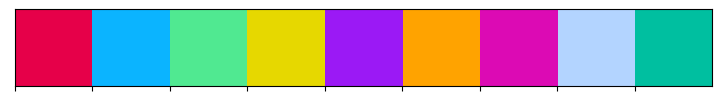

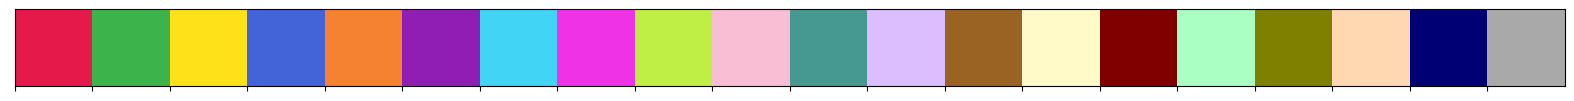

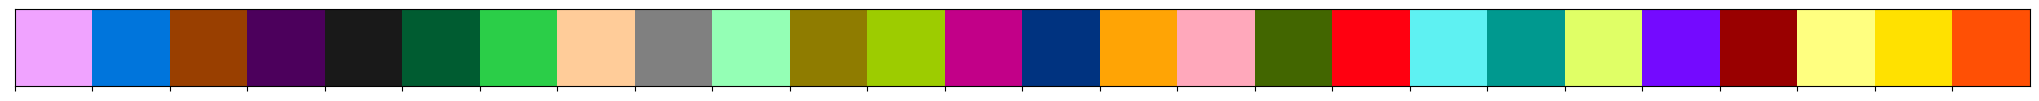

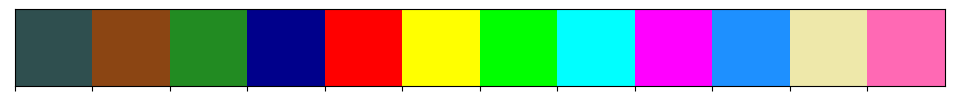

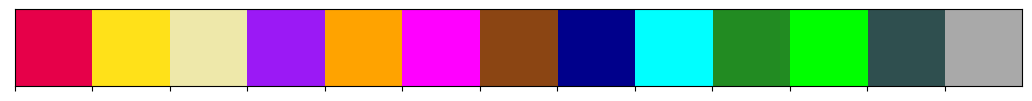

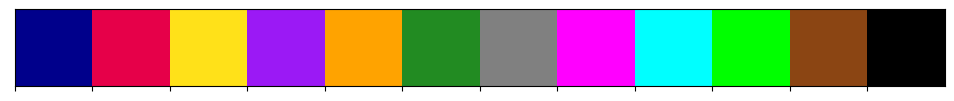

In [2]:
dutch_field = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]  # https://www.heavy.ai/blog/12-color-palettes-for-telling-better-stories-with-your-data
sns.palplot(dutch_field)
accessible_colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9']  # https://sashamaps.net/docs/resources/20-colors/
dist_colors_full = ['#F0A3FF', '#0075DC', '#993F00', '#4C005C', '#191919', '#005C31', '#2BCE48', '#FFCC99', '#808080', '#94FFB5', '#8F7C00', '#9DCC00', '#C20088', '#003380', '#FFA405', '#FFA8BB', '#426600', '#FF0010', '#5EF1F2', '#00998F', '#E0FF66', '#740AFF', '#990000', '#FFFF80', '#FFE100', '#FF5005']  # https://en.wikipedia.org/wiki/Help:Distinguishable_colors
sns.palplot(accessible_colors)
sns.palplot(dist_colors_full)
other_colors = ['#2f4f4f', '#8b4513', '#228b22', '#00008b', '#ff0000', '#ffff00', '#00ff00', '#00ffff', '#ff00ff', '#1e90ff', '#eee8aa', '#ff69b4']  # min luminocity 1%, max luminocity: 80%, https://mokole.com/palette.html
sns.palplot(other_colors)
amir_colors_ordered = ["#e60049", '#ffe119','#eee8aa', "#9b19f5", "#ffa300", '#ff00ff','#8b4513', "#00008b",   '#00ffff', '#228b22', '#00ff00','#2f4f4f','#a9a9a9']
sns.palplot(amir_colors_ordered)
amir_colors = [ "#00008b", "#e60049", '#ffe119', "#9b19f5", "#ffa300", '#228b22', 'gray','#ff00ff', '#00ffff', '#00ff00', '#8b4513', '#000000']
sns.palplot(amir_colors)

In [3]:
flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=0., max_value=1, ncolors=1000)
mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)

In [4]:
# loading databases:
#analysis_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets'
#analysis_db = '/Users/amirhsi_mini/research_data/analysis/'
analysis_db = '../../Datasets/'+project+'-allInOne/' # relative
#analysis_db = '../../Datasets/HnsCub-N200epshm29kbmm2ens1_2-allInOne/' # relative
#analysis_db = '/Users/amirhsi_mini/research_data/'+project+'/allInOne/' # relative
space_dbs = glob(analysis_db + project_details[project]['space_pat'])
print(space_dbs)

['../../Datasets/TransFociCub-allInOne/ns400nl5al3ac1-bug-chainSize-acf.parquet.brotli', '../../Datasets/TransFociCub-allInOne/ns400nl5al5ac1-bug-chainSize-acf.parquet.brotli', '../../Datasets/TransFociCub-allInOne/ns400nl5al1ac1-bug-chainSize.parquet.brotli', '../../Datasets/TransFociCub-allInOne/ns400nl5al3ac1-whole-equilProps.csv', '../../Datasets/TransFociCub-allInOne/ns400nl5al5ac1-whole-equilProps.csv', '../../Datasets/TransFociCub-allInOne/ns400nl5al1ac1-bug-chainSize-acf.parquet.brotli', '../../Datasets/TransFociCub-allInOne/ns400nl5al1ac1-whole-equilProps.csv', '../../Datasets/TransFociCub-allInOne/ns400nl5al5ac1-bug-chainSize.parquet.brotli', '../../Datasets/TransFociCub-allInOne/ns400nl5al3ac1-bug-chainSize.parquet.brotli']


## Loading ensAvg stamps

In [ ]:
stamps_db = '-'.join(
    ['allInOne', project, 'stamps-ensAvg']
)
stamps_db = analysis_db + stamps_db + '.csv'
stamps_db = pd.read_csv(stamps_db)
stamps_db.columns

# Auto-correlation functions

##### Note: In a given space, ensAvg groups differs in their values of bulk volume fraction of crowders (column name: phi_c_bulk)

### Theoretical background:

Below, all the several definitions of autocorrelation function (acf) in the literature are listed. Assuming $A(t)$ is a discrete time-varying property of interest and is collected every $M$ timesteps in a molecular dynamics simulation with the time step $\Delta t$ and time unit $\hat{t}$. First, we define the mean (or average) and unbiased variance of $A(t)$ as what follows

$$\langle A\rangle=\frac{1}{t_{max}}\sum_{t=1}^{t_{max}}A(t)$$
$$\sigma^2_A=\langle A^2 \rangle-\langle A\rangle^2=\frac{1}{t_{max}-1}\sum_{t=1}^{t_{max}}(A(t)-\langle A\rangle)^2$$

where $t_{max}$ is the total number of collected cofigurations or timesteps, or simply the size of $A(t)$, implying the total number of simulated timesteps is $t_{max}\times M$. Given this definition, the acf has been defined in the following ways in the literature:

1. Allen and Tildesley define the *non-normalized* acf in "Computer simulation of liquids - 2017" as

$$c_{AA}(h) = \frac{1}{h_{max}}\sum_{h_0=1}^{h_{max}}A(h_0)A(h_0+h)$$

where $h_{max}=\frac{t_{max}-1}{h}$

2. *1989 - Murat M Greet GS - Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation* defines the acf in "Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation - 1989" as

$$c_{AA}(h) =\frac{\langle (A(h)-\langle A \rangle)(A(0)-\langle A \rangle)\rangle}{\sigma^2_A}=\frac{\langle A(h)A(0)\rangle-\langle A \rangle \langle A(0) \rangle}{\sigma^2_A}$$

See the rest of this artciel to see how correlation time is calculated. See the rest of this artciel to see how correlation time is calculated.

3. In *1989 - Grest GS Kremer K Witten TA et el - Relaxation of Self-Entangled Many-Arm Star Polymers, 1987 - Grest GS Kremer K Witten TA - Structure of Many-Arm Star Polymers A Molecular Dynamics Simulation, and 1977 - Kranbuehl DE Verdier PH - Relaxation of the aspherical shapes of random-coil polymer chains*, the acf is

$$c_{AA}(h) =\frac{\langle A(h)A(0)\rangle-\langle A \rangle^2}{\sigma^2_A}$$

where the average is performed over the initial time steps $h=h_0=0$ taken every $K$ timesteps. Kranbuehl and Verdier runs the whole simulation several times the relaxation time of the end-to-end length.

4. In *1978 - Rapaport DC - Molecular dynamics simulation of polymer chains with excluded volum, and 1979 - Bishop M Ceperley D Frisch HL - Molecular dynamics of polymeric systems* the afc is given by

$$c_{AA}(h) =\frac{\langle A(h)A(h_0+h)\rangle-\langle A(h_0) \rangle^2}{\sigma^2_A(h_0)}$$

where

$$\sigma^2_A(h_0)=\langle A(h_0)^2 \rangle-\langle A(h_0)\rangle^2$$

The averaging should be done over ensembles; however, in practice, the ensemble average is replaced by the time average provided that the timesteps or time interval between successvie $h_0$ values are sufficently lagre so the configurations are uncorrelated.

5. *1981 - Bruns W Bansal R - Molecular dynamics study of a single polymer chain in solution* defines the afc as

$$c_{\vec{A}\vec{A}}(h) = \frac{\sum_{h_0=1}^{t_{max}-h}\vec{A}(h_0).\vec{A}(h_0+h)}{\sum_{h_0=1}^{t_{max}-h}\vec{A}^2(h_0)}$$

where $\vec{A}$ is a vector quantity and $h_0$ is summed over $1,1+p,1+2p,\dots$ instead of $h_0=1,2,3,\dots,t_{max}-h$. For a scalar quantity, this definition is used:

$$c_{AA}(h) = \frac{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A(h_0)A(h_0+h)-\sum_{h_0=1}^{t_{max}-h}A(h_0)\sum_{h_0=1}^{t_{max}-h}A(h_0+h)}{\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0)]^2}-\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)]^2}}=
\frac{\langle A(h_0)A(h_0+h)\rangle-\langle A(h_0)\rangle\langle A(h_0+h)\rangle}{\sqrt{\langle A^2(h_0)\rangle-\langle A(h_0)\rangle^2}-\sqrt{\langle A^2(h_0+h)\rangle-\langle A(h_0+h)\rangle^2}}$$

6. *Brockwell PJ Davis RA - 2016 - Introduction to Time Series and Forecasting* defines the afc in the following way

$$c_{AA}(h) = \frac{cov_{A}(h)}{\sigma_A^2} = \frac{1}{\sigma_A^2}\frac{1}{t_{max}}\sum_{h_0=1}^{t_{max}-h} [A(h_0+h)-\langle A\rangle][A(h_0)-\langle A\rangle]$$





### How to run this Notebook:

1. Check ((spaces_to_read**
2. Check **group** and **species**.
3. check **database**.
4. delete extra **physical** properties based on the preoject.
5. check **nlags** and **ticks**.
6. check **parser** and **spaces_title**.


### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')
                ]
acf_space_dbs

In [ ]:
# read data
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')
                ]
acf = []
dumping_freq = {
        'TransFociCyl': 'bdump',
        'TransFociCub': 'bdump',
        'SumRuleCyl': 'bdump',
        'HnsCub': 'ndump'
    }

for space_db in acf_space_dbs:
    space_acf = pd.read_parquet(space_db)
    ensembles = space_acf['ensemble_long'].unique()
    space_acf.rename(columns={'time':'time_dump_dt'}, inplace=True)
    space_acf['lag_time'] = 0
    space_acf['lag_index'] = 0
    space_acf['space_title'] = ''
    for ens in ensembles:
        s_info = project_details[project]['parser'](
        ens,
        'ensemble_long',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
        )
        space_title_style = {
            #'SumRuleCyl': fr"$N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
            #'TransFociCyl': fr"$n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
            'TransFociCub': fr"$n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, a_c={s_info.dcrowd}$",
            #'HnsCub': fr" $N={s_info.nmon}, N_{{hns}}={s_info.nhns}, a_c={s_info.dcrowd}$"
            }
        cond = space_acf['ensemble_long']==ens
        space_acf.loc[cond,'space_title'] = space_title_style[project]
        n_lags = len(space_acf.loc[cond,'time_dump_dt'])
        space_acf.loc[cond,'lag_time'] = space_acf.loc[cond,'time_dump_dt'] * getattr(
            s_info, dumping_freq[project]
        )
        space_acf.loc[cond,'lag_index'] = np.arange(0,n_lags,dtype=np.int_)
    acf.append(space_acf)
acf = pd.concat(acf,axis=0, ignore_index=True)
acf.reset_index(inplace=True,drop=True)
# a sorted list of unique spaces in the dataset
spaces = acf.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)

# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
acf['phi_c_bulk_round'] = acf['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
acf = acf.loc[~acf['phi_c_bulk_round'].isin([0.025, 0.05, 0.075, 0.125, 0.175]),:]
acf.reset_index(inplace=True, drop=True)
# setting colors for unique crd_c
phi_crds = acf.loc[:,'phi_c_bulk_round'].unique()
phi_crds.sort()
#flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
#flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=0.0, #max_value=1.0, ncolors=200)
#mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)
phi_colors = sns.color_palette("flare_cmap_cut", len(phi_crds))#,as_cmap=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
properties = [property_.split('-acf-mean')[0] for property_ in acf.columns if property_.endswith('-acf-mean')]
properties.sort()
# Define unique specifications for each physical property:
acf_props_specs =  {
    'SumRuleCyl': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$C_{R_FR_F}(\hat{t}_{lags})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL,||}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'transverse furthermost distance',
            'symbol': r'$C_{LL,\perp}(\hat{t}_{lags})$',
            'color': 'orange'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    },
    'TransFociCyl': {
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL,||}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'transverse furthermost distance',
            'symbol': r'$C_{LL,\perp}(\hat{t}_{lags})$',
            'color': 'orange'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    },
    'TransFociCub': {
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    },
    'HnsCub': {
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    }
}
acf_props_specs_project = acf_props_specs[project]

#### space titles

In [ ]:
space_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        'space',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
    )
    space_title_style = {
        #'SumRuleCyl': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        #'TransFociCyl': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFociCub': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, a_c={s_info.dcrowd}$",
        #'HnsCub': fr" $N={s_info.nmon}, N_{{hns}}={s_info.nhns}, a_c={s_info.dcrowd}$"
        }
    space_titles[space] = space_title_style[project]

### ACF with CIs for all the physical properties per space columns wrapped with $\phi_c^{bulk}$

In [ ]:
nlags=7000
ticks = int(nlags/7)
for space in spaces:
    space_acf = acf[acf.space==space]
    plotter.p_acf_with_ci_space(
        space_acf,
        space,
        space_titles[space],
        project,
        properties=acf_props_specs_project,
        ncols=3,
        xlimits=(0, nlags, ticks),
        ylimits=(-0.25, 1, 0.25),
        lags=nlags,
        dpi=100,
        fontsize=18
    )

### ACF of each physical property in a project collored with an attribute

In [ ]:
#property_= 'gyrTMon'
legend_anchor = (1.1,1.02)
nrows = len(spaces)
for property_ in acf_props_specs_project.keys():
    plotter.p_acf_allInOne_project(
        acf,
        project,
        space_titles,
        property_,
        acf_props_specs_project[property_],
        phi_crds,
        phi_colors,
        xlimits=(0, nlags, ticks),
        nrows=nrows,
        ncols=1,
        legend_anchor=legend_anchor,
        lags=nlags
    )

### Single phi_c plot

In [ ]:
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

In [ ]:
def get_label_for_line(ax, line):
    """
    Return the label of a 2D `line` in a given `ax`
    """
    leg = ax.axes.get_legend()
    ind = ax.axes.get_lines().index(line)
    return leg.texts[ind].get_text()

def fill_between_lines(ax, data, attr, y1, y2, alpha=.2, **kwargs):
    n_attrs = len(data[attr].drop_duplicates())
    for line in ax.lines[:n_attrs]:
        x, _ = line.get_xydata().T
        attr_value = get_label_for_line(ax, line)
        line_data = data.loc[data[attr]==attr_value,:]
        ax.fill_between(
            x,
            line_data[y1],
            line_data[y2],
            color=line.get_color(),
            alpha=alpha,
            **kwargs
        )

In [ ]:
# Below definition depends on how organize input paramaters in a project
phi_c_chosen = 0.4
acf_phi_c_filtered = \
    acf.loc[acf['phi_c_bulk_round'].isin([phi_c_chosen]),:]
acf_phi_c_filtered.reset_index(inplace=True)
group_by_cols = {
    'SumRuleCyl': ['nmon','dcyl','dcrowd'],
    'TransFociCub': ['nmon_large'],
    'TransFociCyl': ['nmon_large'],
    'HnsCub': ['nhns','dcrowd'],
}
acf_phi_c_filtered.sort_values(group_by_cols[project], inplace=True)
ext ='pdf'
save_to = './'
font_scale = 2
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in'
}
font_family = 'Times-Roman'
x_prop = 'lag_index'
hue_attr = 'space_title'

aspect = 1.618 # golden ratio
color_palette='tab20'
fig_title_kws = {'x': 0.5, 'y': 1.0}
height = 6
legend_kws = {
    'loc': 'upper left',
    'ncol': 1,
    'bbox_to_anchor': (1, 1),
    'frameon': False,
    'markerscale': 2,
}
for prop_ in properties:
    y_prop = prop_ + '-acf-mean'
    y_high = prop_ + '-acfUpperCi-mean'
    y_low = prop_ + '-acfLowerCi-mean'
    data = acf_phi_c_filtered.loc[:,[x_prop,hue_attr,y_prop,y_low,y_high]]
    fig, ax = plt.subplots(figsize=(height*aspect,height))
    #ax.set_aspect(1/(3*golden_ratio))
    sns.set_theme(
        context='talk',
        style='ticks',
        font=font_family,
        rc=rc_params,
    )
    tseries_grid = sns.lineplot(
        data=data,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        legend='full',
        errorbar=None,
        alpha=0.75,
        ax=ax,
        lw=1.5,
        palette=amir_colors
    )
    tseries_grid.axhline(y=0, c='black', ls='--', lw=1)
    fill_between_lines(tseries_grid, data, hue_attr, y_low, y_high, alpha=.2)
    tseries_grid.set_xlabel(attr_labels[x_prop])
    tseries_grid.set_ylabel(
        acf_props_specs_project[y_prop.split('-')[0]]['symbol'])
    leg = tseries_grid.legend(title=rf'System ($\phi_c={phi_c_chosen}$)',**legend_kws)
    for i in leg.legendHandles:
        i.set_linewidth(3)
    output = "-".join(
        ["acf-confidence_intervals", project, y_prop,x_prop, hue_attr]) + f"-phic{phi_c_chosen}." + ext
    fig.savefig(save_to + output, bbox_inches='tight')
    plt.close()

# Chain measure time-series plots

### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
%%time
chainsize_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('chainSize.parquet.brotli')
                      ]
chainsize = [pd.read_parquet(space_db) for space_db in chainsize_space_dbs]
chainsize = pd.concat(chainsize,axis=0, ignore_index=True)
chainsize.reset_index(inplace=True,drop=True)
print(chainsize.columns)
# droping some of the columns
cols_to_drop = {
    'SumRuleCyl': []
    #'SumRuleCyl': ['asphericityTMon-var', 'asphericityTMon-sem',
     #              'fsdTMon-var','fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem',
      #             'rfloryTMon-var', 'rfloryTMon-sem', 'shapeTMon-var',
       #            'shapeTMon-sem', 'transSizeTMon-var', 'transSizeTMon-sem'
                  ,
    'TransFociCyl': ['asphericityTMon-var', 'asphericityTMon-sem',
                     'fsdTMon-var', 'fsdTMon-sem', 'gyrTMon-var',
                     'gyrTMon-sem', 'shapeTMon-var','shapeTMon-sem',
                     'transSizeTMon-var', 'transSizeTMon-sem'
                    ],
    'TransFociCub': ['asphericityTMon-var', 'asphericityTMon-sem',
                     'gyrTMon-var', 'gyrTMon-sem', 'shapeTMon-var',
                     'shapeTMon-sem'
                    ],
    'HnsCub': ['asphericityTMon-var', 'asphericityTMon-sem', 'gyrTMon-var',
               'gyrTMon-sem', 'shapeTMon-var','shapeTMon-sem'
              ]
}
chainsize.drop(columns=cols_to_drop[project],inplace=True)
# a sorted list of unique spaces in the dataset
spaces = chainsize.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
chainsize['phi_c_bulk_round'] = chainsize['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize = chainsize.loc[~chainsize['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize.reset_index(inplace=True, drop=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
ext = '-mean'
properties = [
    prop.split(ext)[0] for prop in chainsize.columns if prop.endswith(ext)
]
properties.sort()
# change the name of cols after fining properties based on "mean" in their name
new_columns = [prop.split(ext)[0] for prop in chainsize.columns]
chainsize.columns = new_columns
# Define unique specifications for each physical property:

In [ ]:
chainsize_props_labels =  {
    'SumRuleCyl': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$R_F(\hat{t})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{\perp}(\hat{t})$',
            'color': 'crismon'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
    'TransFociCyl':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{||}(\hat{t})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{\perp}(\hat{t})$',
            'color': 'crismon'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
     'TransFociCub':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        },
        'gyrTMon-zscoreNorm': {
            'name': 'radius of gyration',
            'symbol': r'$(R_g(\hat{t})-\langle R_g \rangle)/\sigma_{R_g}$',
            'color':'steelblue'
        },
        'asphericityTMon-zscoreNorm': {
            'name': 'asphericity',
            'symbol': r'$(\Delta(\hat{t})-\langle \Delta \rangle)/\sigma_{\Delta}$',
            'color': 'goldenrod'
        },
        'shapeTMon-zscoreNorm': {
            'name': 'shape parameter',
            'symbol': r'$(S(\hat{t})-\langle S \rangle)/\sigma_{S}$',
            'color': 'orchid'
        }
    },
    'HnsCub':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        },
        'gyrTMon-zscoreNorm': {
            'name': 'radius of gyration',
            'symbol': r'$(R_g(\hat{t})-\langle R_g \rangle)/\sigma_{R_g}$',
            'color':'steelblue'
        },
        'asphericityTMon-zscoreNorm': {
            'name': 'asphericity',
            'symbol': r'$(\Delta(\hat{t})-\langle \Delta \rangle)/\sigma_{\Delta}$',
            'color': 'goldenrod'
        },
        'shapeTMon-zscoreNorm': {
            'name': 'shape parameter',
            'symbol': r'$(S(\hat{t})-\langle S \rangle)/\sigma_{S}$',
            'color': 'orchid'
        }
    }
}

#### space_title

In [ ]:
chainsize['space_title'] = ''
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        'space',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
    )
    space_title_style = {
        #'SumRuleCyl': fr"$N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        #'TransFociCyl': fr"$n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFociCub': fr"$n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, a_c={s_info.dcrowd}$",
        #'HnsCub': fr" $N={s_info.nmon}, N_{{hns}}={s_info.nhns}, a_c={s_info.dcrowd}$"
        }
    cond = chainsize['space'] == space
    chainsize.loc[cond,'space_title'] = space_title_style[project]

### Time series per physical properties per space with an attribute for hues and cols

In [ ]:
ext = 'pdf'
save_to = './'
#col_attr = 'lcyl'
hue_attr = 'phi_c_bulk_round'
x_prop = 't_index' # 'time'
golden_ratio = 1.618
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in'
}
font_family = 'Times-Roman'
move_legend_kws = {
    'loc': 'upper left',
    'ncol': 1,
    'bbox_to_anchor': (1.04, 1),
    'frameon': False,
    'markerscale': 1.5
}
for space in spaces:
    chainsize_space = chainsize.loc[chainsize['space']==space]
    for y_prop in properties:
        fig, ax = plt.subplots()
        #ax.set_aspect(1/(3*golden_ratio))
        sns.set_theme(
        context='talk',
        style='ticks',
        font=font_family,
        #font_scale=1,
        rc=rc_params
        )
        tseries_grid = sns.lineplot(
            data=chainsize_space,
            x=x_prop,
            y=y_prop,
            hue=hue_attr,
            legend='full',
            errorbar=None,
            ax=ax
        )
        tseries_grid.set_xlabel(attr_labels[x_prop])
        tseries_grid.set_ylabel(
            chainsize_props_labels[project][y_prop]['symbol'])
        #tseries_grid.set(xscale="log")
        tseries_grid.legend(title=attr_labels[hue_attr],**move_legend_kws)
        #tseries_grid.set_title(space_titles[space])
        output = "-".join(["tseries", project, space, y_prop]) + "." + ext
        fig.savefig(save_to + output, bbox_inches='tight')
        plt.close()

## Log scale
for space in spaces:
    chainsize_space = chainsize.loc[chainsize['space']==space]
    for y_prop in properties:
        fig, ax = plt.subplots()
        #ax.set_aspect(1/(3*golden_ratio))
        sns.set_theme(
        context='talk',
        style='ticks',
        font=font_family,
        #font_scale=1,
        rc=rc_params
        )
        tseries_grid = sns.lineplot(
            data=chainsize_space,
            x=x_prop,
            y=y_prop,
            hue=hue_attr,
            legend='full',
            errorbar=None,
            ax=ax
        )
        tseries_grid.set_xlabel(attr_labels[x_prop])
        tseries_grid.set_ylabel(
            chainsize_props_labels[project][y_prop]['symbol'])
        tseries_grid.set(xscale="log")
        tseries_grid.legend(title=attr_labels[hue_attr],**move_legend_kws)
        #tseries_grid.set_title(space_titles[space])
        output = "-".join(["tseries-xLog", project, space, y_prop]) + "." + ext
        fig.savefig(save_to + output, bbox_inches='tight')
        plt.close()

### Single phi_c plot

In [ ]:
max_time_per_space = chainsize.groupby('ensemble_long')['t_index'].max()
max_time_per_space = max_time_per_space.reset_index()
#chainsize['time_norm'] = 0
for ens_long in max_time_per_space['ensemble_long']:
    max_time = \
        max_time_per_space.loc[
            max_time_per_space['ensemble_long']==ens_long, 't_index'].values[0]
    ens_cond = chainsize['ensemble_long'] == ens_long
    chainsize.loc[ens_cond, 't_idx_norm'] = \
        chainsize.loc[ens_cond, 't_index'] / max_time

In [ ]:
phi_c_to_keep = [0.4]
chainsize_phi_c_filtered = \
    chainsize.loc[chainsize['phi_c_bulk_round'].isin(phi_c_to_keep),:]
chainsize_phi_c_filtered.reset_index(inplace=True)
group_by_cols = {
    'SumRuleCyl': ['nmon','dcyl','dcrowd'],
    'TransFociCub': ['nmon_large'],
    'TransFociCyl': ['nmon_large'],
    'HnsCub': ['nhns','dcrowd'],
}
chainsize_phi_c_filtered.sort_values(group_by_cols[project], inplace=True)

In [ ]:
# Below definition depends on how organize input paramaters in a project
ext ='pdf'
save_to = './'
font_scale = 2
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in'
}
font_family = 'Times-Roman'
x_prop = 't_idx_norm'
hue_attr = 'space_title'
aspect = 1.618 # golden ratio
color_palette='tab20'
fig_title_kws = {'x': 0.5, 'y': 1.0}
height = 6
t_idx_nrom_cutoff = 0
legend_kws = {
    'loc': 'upper left',
    'ncol': 1,
    'bbox_to_anchor': (1, 1),
    'frameon': False,
    'markerscale': 2,
}
for y_prop in properties:
    data = chainsize_phi_c_filtered.loc[chainsize_phi_c_filtered['t_idx_norm']>=t_idx_nrom_cutoff,[x_prop,hue_attr,y_prop]]
    fig, ax = plt.subplots(figsize=(height*aspect,height))
    #ax.set_aspect(1/(3*golden_ratio))
    sns.set_theme(
        context='talk',
        style='ticks',
        font=font_family,
        rc=rc_params,
    )
    tseries_grid = sns.lineplot(
        data=data,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        legend='full',
        errorbar=None,
        alpha=0.75,
        ax=ax,
        lw=1.5,
        palette=amir_colors
    )
    tseries_grid.set_xlabel(attr_labels[x_prop])
    tseries_grid.set_ylabel(
        chainsize_props_labels[project][y_prop]['symbol'])
    tseries_grid.set(xscale="log")#,yscale='log')
    leg = tseries_grid.legend(title=r'System ($\phi_c=0.4$)',**legend_kws)
    for i in leg.legendHandles:
        i.set_linewidth(3)
    output = "-".join(
        ["tseries-xLog", project, y_prop,x_prop, hue_attr]) + f"-phic{phi_c_to_keep[0]}." + ext
    fig.savefig(save_to + output, bbox_inches='tight')
    plt.close()

### Time series of each property per porject colored by space col wrapped by attribute

#### SumRule

In [ ]:
# Below definition depends on how organize input paramaters in a project
s_info = project_details[project]['parser'](
    spaces[0],
    'space',
    project_details[project]['geometry'],
    project_details[project]['group'],
    project_details[project]['topology'],
    ispath=False
)
# TransFociCub
project_title = fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_c={s_info.dcrowd}$"
# TransFociCyl
#project_title = fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
ext ='pdf'
save_to = './'
height = 5
aspect = 2 * 1.618 # golden ratio

plot_context = 'talk'
font_scale = 2
fig_title_kw = {'x': 0.5, 'y': 0.98}
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'legend.facecolor': 'facecolor',
    'legend.frameon': True,
    'legend.facecolor': 'lightgray',
    'legend.borderpad': 0.1
    #'axes.grid.which': 'both'
    }
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
color_palette='rocket_r'
loc='best'

sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)

x_prop = 'time'
row_attr = 'dcrowd'
row_order = chainsize[row_attr].unique()
hue_attr = 'phi_c_bulk_round'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        row=row_attr,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[row_attr]+r"$={row_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, row_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

x_prop = 'time'
col_attr = 'phi_c_bulk_round'
col_order = chainsize[col_attr].unique()
hue_attr = 'dcyl'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        col=col_attr,
        col_wrap=2,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[col_attr]+r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, col_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

#### TransFoci

In [ ]:
# Below definition depends on how organize input paramaters in a project
s_info = project_details[project]['parser'](
    spaces[0],
    'space',
    project_details[project]['geometry'],
    project_details[project]['group'],
    project_details[project]['topology'],
    ispath=False
)
# TransFociCub
project_title = fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_c={s_info.dcrowd}$"
# TransFociCyl
#project_title = fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
ext ='pdf'
save_to = './'
height = 5
aspect = 2 * 1.618 # golden ratio

plot_context = 'talk'
font_scale = 2
fig_title_kw = {'x': 0.5, 'y': 0.98}
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'legend.facecolor': 'facecolor',
    'legend.frameon': True,
    'legend.facecolor': 'lightgray',
    'legend.borderpad': 0.1
    #'axes.grid.which': 'both'
    }
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34}#, 'x': 0.5, 'y': 0.93}
color_palette='rocket_r'
loc='best'

sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)

x_prop = 'time'
row_attr = 'dmon_large'
row_order = chainsize[row_attr].unique()
hue_attr = 'phi_c_bulk_round'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        row=row_attr,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[row_attr]+r"$={row_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, row_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

x_prop = 'time'
col_attr = 'phi_c_bulk_round'
col_order = chainsize[col_attr].unique()
hue_attr = 'dmon_large'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        col=col_attr,
        col_wrap=2,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[col_attr]+r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, col_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

#### HnsFoci

In [ ]:
# Below definition depends on how organize input paramaters in a project
s_info = project_details[project]['parser'](
    spaces[0],
    'space',
    project_details[project]['geometry'],
    project_details[project]['group'],
    project_details[project]['topology'],
    ispath=False
)
# HnsCub
project_title = fr" $N={s_info.nmon}, a_c={s_info.dcrowd}$"

ext ='pdf'
save_to = './'

height = 5
aspect = 2 * 1.618 # golden ratio

plot_context = 'talk'
font_scale = 2
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'legend.facecolor': 'facecolor',
    'legend.frameon': True,
    'legend.facecolor': 'lightgray',
    'legend.borderpad': 0.1
    #'axes.grid.which': 'both'
    }
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
color_palette='rocket_r'
loc='best'

sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)

x_prop = 'time'
row_attr = 'nhns'
row_order = chainsize[row_attr].unique()
hue_attr = 'phi_c_bulk_round'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        row=row_attr,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[row_attr]+r"$={row_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, row_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

x_prop = 'time'
col_attr = 'phi_c_bulk_round'
col_order = chainsize[col_attr].unique()
hue_attr = 'nhns'
for y_prop in properties:
    tseries_grid = sns.relplot(
        data=chainsize,
        x=x_prop,
        y=y_prop,
        hue=hue_attr,
        col=col_attr,
        col_wrap=2,
        kind='line',
        height=height,
        aspect=aspect,
        facet_kws=facet_kws,
        legend='full',
        zorder=2,
        alpha=0.8,
        errorbar=None,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[col_attr]+r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set_xlabels(attr_labels[x_prop])
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.fig.suptitle(project_title, **fig_title_kws)
    output = "-".join(["tseries", project, y_prop, hue_attr, col_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

# Chain size distributions plots

### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
%%time
chainsize_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('chainSize.parquet.brotli')
                      ]
chainsize = [pd.read_parquet(space_db) for space_db in chainsize_space_dbs[:1]]
chainsize = pd.concat(chainsize,axis=0, ignore_index=True)
chainsize.reset_index(inplace=True,drop=True)
print(chainsize.columns)
# droping some of the columns
cols_to_drop = {
    'SumRuleCyl': ['asphericityTMon-var', 'asphericityTMon-sem',
                   'fsdTMon-var','fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem',
                   'rfloryTMon-var', 'rfloryTMon-sem', 'shapeTMon-var',
                   'shapeTMon-sem', 'transSizeTMon-var', 'transSizeTMon-sem'
                  ],
    'TransFociCyl': ['asphericityTMon-var', 'asphericityTMon-sem',
                     'fsdTMon-var', 'fsdTMon-sem', 'gyrTMon-var',
                     'gyrTMon-sem', 'shapeTMon-var','shapeTMon-sem',
                     'transSizeTMon-var', 'transSizeTMon-sem'
                    ],
    'TransFociCub': ['asphericityTMon-var', 'asphericityTMon-sem',
                     'gyrTMon-var', 'gyrTMon-sem', 'shapeTMon-var',
                     'shapeTMon-sem'
                    ],
    'HnsCub': ['asphericityTMon-var', 'asphericityTMon-sem', 'gyrTMon-var',
               'gyrTMon-sem', 'shapeTMon-var','shapeTMon-sem'
              ]
}
chainsize.drop(columns=cols_to_drop[project],inplace=True)
# a sorted list of unique spaces in the dataset
spaces = chainsize.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
chainsize['phi_c_bulk_round'] = chainsize['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize = chainsize.loc[~chainsize['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize.reset_index(inplace=True, drop=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
ext = '-mean'
properties = [
    prop.split(ext)[0] for prop in chainsize.columns if prop.endswith(ext)
]
properties.sort()
# change the name of cols after fining properties based on "mean" in their name
new_columns = [prop.split(ext)[0] for prop in chainsize.columns]
chainsize.columns = new_columns
# Define unique specifications for each physical property:

In [ ]:
sns.histplot(data=chainsize, x='fsdTMon',hue='ensemble',common_norm=True,legend=False)

In [ ]:
chainsize_props_labels =  {
    'SumRuleCyl': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$R_F(\hat{t})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{\perp}(\hat{t})$',
            'color': 'crismon'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
    'TransFociCyl':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{||}(\hat{t})$',
            'color': 'forestgreen'
        },
        'transSizeTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L_{\perp}(\hat{t})$',
            'color': 'crismon'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
     'TransFociCub':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        },
        'gyrTMon-zscoreNorm': {
            'name': 'radius of gyration',
            'symbol': r'$(R_g(\hat{t})-\langle R_g \rangle)/\sigma_{R_g}$',
            'color':'steelblue'
        },
        'asphericityTMon-zscoreNorm': {
            'name': 'asphericity',
            'symbol': r'$(\Delta(\hat{t})-\langle \Delta \rangle)/\sigma_{\Delta}$',
            'color': 'goldenrod'
        },
        'shapeTMon-zscoreNorm': {
            'name': 'shape parameter',
            'symbol': r'$(S(\hat{t})-\langle S \rangle)/\sigma_{S}$',
            'color': 'orchid'
        }
    },
    'HnsCub':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        },
        'gyrTMon-zscoreNorm': {
            'name': 'radius of gyration',
            'symbol': r'$(R_g(\hat{t})-\langle R_g \rangle)/\sigma_{R_g}$',
            'color':'steelblue'
        },
        'asphericityTMon-zscoreNorm': {
            'name': 'asphericity',
            'symbol': r'$(\Delta(\hat{t})-\langle \Delta \rangle)/\sigma_{\Delta}$',
            'color': 'goldenrod'
        },
        'shapeTMon-zscoreNorm': {
            'name': 'shape parameter',
            'symbol': r'$(S(\hat{t})-\langle S \rangle)/\sigma_{S}$',
            'color': 'orchid'
        }
    }
}

# Equilibrium chain-size measures

## SumRule

In [ ]:
#species = 'Mon'
#allInOne_db = '../../Datasets/' # mac-mini
#allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
allInOne_db = '../../Datasets/'+project+'-allInOne/' # relative
group = 'bug'
geometry = 'cylindrical'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
attributes = project_details[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
norm_props = [
    'gyrMon-norm', 'fsdMon-norm', 'rfloryMon-norm', 'asphericityMon-norm',
    'shapeMon-norm', 'transSizeMon-norm'
]
#norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'rfloryMon-norm', 'asphericityMon-mean', #'shapeMon-mean','transSizeMon-norm'
#]
selected_cols = attributes + norm_props
value_vars = norm_props
#gyr_fsd_only_norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
#selected_cols = attributes + gyr_fsd_only_norm_props
#value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
chainsize_melted['confinement_rate'] = np.round(
        (chainsize_melted['dcrowd'] /
         (chainsize_melted['dcyl'] - chainsize_melted['dcrowd'])), 3
)

### S and Delta not named

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

row_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

style_attr = 'nmon'
style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

size_attr = 'dcyl'
size_order = sorted(chainsize_melted[size_attr].unique())
sizes=[1+1.5*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'dcrowd'
hue_order = sorted(chainsize_melted[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (1., 0.95),
    'frameon': True,
    'facecolor': 'aliceblue',
    #'borderpad': 0.1,
    'markerscale': 1.5
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    markers=True,
    dashes=False,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=15,
#    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.2,0.2,0.2,0.4,0.4]):
    ymin, ymax = ax.get_ylim()
    ymin = utilizer.round_up_nearest(ymin, 0.2, 1)
    ymax = utilizer.round_up_nearest(ymax, 0.2, 1)
    print(properties_labels[project][prop]["symbol"])
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_ylim(ymin-0.2*ystep, ymax+0.2*ystep)
    ax.set_title("")
#tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = [attr_labels[hue_attr]] + list(hue_order)  + \
    [attr_labels[size_attr]] + list(size_order) +  \
        [attr_labels[style_attr]] + list(style_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(
    xticks=np.arange(0,0.5,0.1)
)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, size_attr, 'chainMeasures'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
#plt.close()

### S and Delta nomred

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

row_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

style_attr = 'nmon'
style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

size_attr = 'dcyl'
size_order = sorted(chainsize_melted[size_attr].unique())
sizes=[1+1.5*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'dcrowd'
hue_order = sorted(chainsize_melted[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (1., 0.95),
    'frameon': True,
    'facecolor': 'aliceblue',
    #'borderpad': 0.1,
    'markerscale': 1.5
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    markers=True,
    dashes=False,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=15,
#    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.2,0.2,0.2,0.2]):
    ymin, ymax = ax.get_ylim()
    ymin = utilizer.round_up_nearest(ymin, 0.2, 1)
    ymax = utilizer.round_up_nearest(ymax, 0.2, 1)
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_ylim(ymin-0.2*ystep, ymax+0.2*ystep)
    ax.set_title("")
#tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = [attr_labels[hue_attr]] + list(hue_order)  + \
    [attr_labels[size_attr]] + list(size_order) +  \
        [attr_labels[style_attr]] + list(style_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(
    xticks=np.arange(0,0.5,0.1)
)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, size_attr, 'chainMeasures'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

### a_c=a

In [ ]:
dcrowd_cond = (chainsize_melted['dcrowd'].isin([1.0]))
cond = dcrowd_cond
data = chainsize_melted.loc[cond, :].copy()
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

col_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

#style_attr = 'dcyl'
#style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

size_attr = 'nmon'
size_order = sorted(data[size_attr].unique())
sizes=[3+2*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'dcyl'
hue_order = sorted(data[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (1., 0.95),
    'frameon': True,
    'facecolor': 'aliceblue',
    #'borderpad': 0.1,
    'markerscale': 2
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    #style=style_attr,
    #style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    markers=True,
    dashes=True,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=10,
    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.1,0.2,0.02,0.05]):
    ymin, ymax = ax.get_ylim()
    ymin = utilizer.round_up_nearest(ymin, ystep, 2)
    ymax = utilizer.round_up_nearest(ymax, ystep, 1)
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_ylim(ymin-0.5*ystep, ymax+0.5*ystep)
    ax.set_title("")
#tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = ([attr_labels[hue_attr]] + list(hue_order)  + \
    [attr_labels[size_attr]] + list(size_order)# +  \
        #[attr_labels[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(
    xticks=np.arange(0,0.5,0.1)
)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, size_attr, 'chainMeasures-DcrowdEqualDmon'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

## TransFociCyl

In [ ]:
#species = 'Mon'
allInOne_db = '../../Datasets/allInOne/' # mac-mini
#allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'bug'
geometry = 'cylindrical'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
attributes = project_details[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
## Style 1: asphericiity adn shape parameter normalized
#norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-norm', 'shapeMon-norm'
#]
#selected_cols = attributes + norm_props
#value_vars = norm_props
## Style 2: asphericiity adn shape parameter not normalized
gyr_fsd_only_norm_props = [
    'gyrMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
]
selected_cols = attributes + gyr_fsd_only_norm_props
value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
# dictionary of normalizer properties' features
project_titles = {}
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        'space',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
    )
    project_title_style = {
        #'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
        'TransFociCyl': fr" $N_m={s_info.nmon_small}, N_M={s_info.nmon_large}, {{D}}/{{a_m}}={s_info.dcyl}, {{a_c}}/{{a_m}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'
hue_attr = 'dmon_large'
col_attr = 'variable'
col_order = value_vars
col_wrap = 1
save_to = './'
ext = 'pdf'
# The three lines below are for transc foci
color_palette = dmon_large_c_palette
markers=['o', 'o', '^']
dashes=[(2, 2), (2, 2), (1, 0)]
#color_palette = 'colorblind'
plot_context = 'talk'
font_scale = 2
height = 6
aspect = 1.618
ylabel_pad = 50
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.45, 'y': 0.95}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'bbox_to_anchor': (0.21, 0.65),
    'frameon': True,
    'facecolor': 'lightgray',
    'borderpad': 0.1
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    legend='full',
    hue=hue_attr,
    style=hue_attr,
    kind='line',
    dashes=dashes,
    markers=markers,
    height=height,
    aspect=aspect,
    palette=color_palette,
    col_wrap=col_wrap,
    facet_kws=facet_kws,
    markersize=15
)
for ax, prop in zip(tseries_grid.axes.flat, col_order):
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_title(None)
axis_ls = tseries_grid.axes[1]
vline_patch = tuner.marker_ls_handler(
    ['False', 'True'], ['--', '-'], ['o', '^'],color='black'
)
axis_ls.legend(
    title='Collapse transition',
    handles=vline_patch,
    bbox_to_anchor=(0.67, 0.48),
    frameon=True,
    facecolor='lightgray',
    borderpad=0.1
)
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
#tseries_grid.tight_layout(w_pad=1)
tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(xticks=np.arange(0,0.5,0.1))
#tseries_grid.set(yticks=np.arange(0,1.2,0.2), xticks=np.arange(0,0.5,0.1))
output = "-".join(["equilPlot", project, 'chainMeasures', x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

## TransFociCub

In [ ]:
#species = 'Mon'
#allInOne_db = '../../Datasets/' # mac-mini
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'bug'
geometry = 'biaxial'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
attributes = project_details[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
# option 1: norms of asphericityMon-norm and shapeMona
norm_props = [
    'gyrMon-norm', 'asphericityMon-norm', 'shapeMon-norm'
]
selected_cols = attributes + norm_props
value_vars = norm_props
# option 2: means of asphericityMon-norm and shapeMona
#gyr_fsd_only_norm_props = [
#    'gyrMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
#selected_cols = attributes + gyr_fsd_only_norm_props
#value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
# dictionary of normalizer properties' features
project_titles = {}
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        'space',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
    )
    project_title_style = {
        'TransFociCub': fr" $N_m={s_info.nmon_small}, N_M={s_info.nmon_large}, {{a_c}}/{{a_m}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'
hue_attr = 'dmon_large'
col_attr = 'variable'
col_order = value_vars
col_wrap = 1
save_to = './'
ext = 'pdf'
# The three lines below are for transc foci
color_palette = dmon_large_c_palette
markers=['o', 'o', '^']
dashes=[(2, 2), (2, 2), (1, 0)]
#color_palette = 'colorblind'
plot_context = 'talk'
font_scale = 2
height = 6
aspect = 1.618
ylabel_pad = 50
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': True,
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'bbox_to_anchor': (0.25, 0.65),
    'frameon': True,
    'facecolor': 'lightgray',
    'borderpad': 0.1
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    legend='full',
    hue=hue_attr,
    style=hue_attr,
    kind='line',
    dashes=dashes,
    markers=markers,
    height=height,
    aspect=aspect,
    palette=color_palette,
    col_wrap=col_wrap,
    facet_kws=facet_kws,
    markersize=15
)
for ax, prop in zip(tseries_grid.axes.flat, col_order):
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_title(None)
#axis_ls = tseries_grid.axes[1]
#vline_patch = tuner.marker_ls_handler(
#    ['False', 'True'], ['--', '-'], ['o', '^'],color='black'
#)
#axis_ls.legend(
#    title='Collapse transition',
#    handles=vline_patch,
#    bbox_to_anchor=(0.64, 0.53),
#    frameon=True,
#    facecolor='lightgray',
#    borderpad=0.1
#)
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.fig.suptitle(project_titles[project])#, **fig_title_kws)
#tseries_grid.tight_layout(w_pad=1)
tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
#tseries_grid.set(yticks=np.arange(0,1.2,0.2), xticks=np.arange(0,0.5,0.1))
tseries_grid.set(yticks=np.arange(0,1.2,0.2), xticks=np.arange(0,0.5,0.1))
output = "-".join(["equilPlot", project, 'chainMeasures', x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

## TransFoci Cub and Cyl

## HnsCub

In [ ]:
#species = 'Mon'
#allInOne_db = '../../Datasets/' # mac-mini
#allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'nucleoid'
geometry = 'cylindrical'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = analysis_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
print(chainsize_equil.columns)
attributes = project_details[project]['equil_attributes']
# option 1: norms of asphericityMon and shapeMon
norm_props = [
    'gyrMon-norm', 'asphericityMon-norm', 'shapeMon-norm'
]
# option 2: means of asphericityMon and shapeMon
#norm_props = [
#    'gyrMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
# melting properties columns
selected_cols = attributes + norm_props
value_vars = norm_props
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

row_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

style_attr = 'dcrowd'
style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

#size_attr = 'nhns'
#size_order = sorted(chainsize_melted[size_attr].unique())
#sizes=[1+1.5*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'nhns'
hue_order = sorted(chainsize_melted[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
#color_palette = 'hls'
color_palette = amir_colors
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 1.5
height = 5
aspect = 1.5*1.618
ylabel_pad = 50
rc_params= {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': True,
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='center right'
font_family = 'sans-serif'
legend_global_kws = {
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    #'loc': 'lower left',
}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.8,1),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    'markerscale': 3,
    'title': ''
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    #size=size_attr,
    #size_order=size_order,
    #sizes=sizes,
    #markers=True,
    markers=['s','o'],
    dashes=False,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=15,
#    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.2,0.2]):
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_title("")
#tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.tight_layout(w_pad=1)
#legend_labels = [attr_labels[hue_attr]] + list(hue_order)  + \
#        [attr_labels[style_attr]] + list(style_order)
#for idx, new_label in enumerate(legend_labels):
#    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.set(xticks=np.arange(0,0.45,0.1),yticks=np.arange(0,1.1,0.2))
if style_attr == 'dcrowd':
    style_attr_name = style_attr + '-' + project
legend_labels = [attr_labels[hue_attr]] + list(hue_order)  + \
        [attr_labels[style_attr_name]] + list(style_order)
tseries_grid._legend.set_title('')
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
#sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
#sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
#tseries_grid.fig.tight_layout(pad=1)
# globe size line
hns_cond = (chainsize_equil['nhns'] == 0)
phi_c_cond = (chainsize_equil['phi_c_bulk_round'] == 0)
dcrowd_cond = (chainsize_equil['dcrowd'] == 2)
gyr_phic0_hns0_ac2 = chainsize_equil.loc[hns_cond & phi_c_cond & dcrowd_cond, 'gyrMon-mean'].values[0]
nmon = chainsize_equil['nmon'].values[0]
globe_size = nmon**(1/3)
globe_line = tseries_grid.axes.flatten()[0].axhline(y=globe_size/gyr_phic0_hns0_ac2,ls=':')
tseries_grid.axes.flatten()[0].legend([globe_line],
                          [r"${R_{globe}}/{R_{g,0}}=aN^{1/3}/{R_{g,0}}$"],
                          **legend_global_kws)
# saving
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, 'chainMeasures'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

# Clusters and Bonds of Large monomers (TransFoci Project)

## Merging bonds and cluster data

### TransFociCyl

In [ ]:
hist_properties = ['clustersHistFoci', 'bondsHistFoci']
#hist_names = dict(zip(hist_properties, ['clusters', 'bonds']))
measures = ['mean', 'sem', 'var']
species = 'Foci'
bin_center_labels = {
   'clustersHistFoci': '$x_c$',
   'bondsHistFoci': '$x_d$'
}
save_to = './'
ext = 'pdf'
foci = []
for prop in hist_properties:
    cols_to_drop = [prop + '-' + measure for measure in  measures]
    attr_labels['bin_center'] = bin_center_labels[prop]
    hist_df = '-'.join(['allInOne', project, group, prop + '.parquet.brotli'])
    hist_df = analysis_db + hist_df
    hist_df = pd.read_parquet(hist_df)
    hist_df.drop(columns=cols_to_drop, inplace=True)
    #hist_df.reset_index(inplace=True, drop=True)
    hist_df['property'] = prop
    hist_df.rename(columns={prop + '-norm': 'value'}, inplace=True)
    foci.append(hist_df)
foci =  pd.concat(foci, axis=0)
spaces = foci[['nmon_small','nmon_large', 'dcyl', 'dcrowd']].drop_duplicates().sort_values(by=['nmon_small','nmon_large', 'dcyl', 'dcrowd']).values
project_titles = {}
for (nmon_small, nmon_large, dcyl, dcrowd) in spaces:
    project_title_style = {
        'TransFociCyl': fr" $N_m={nmon_small}, N_M={nmon_large}, {{D}}/{{a_m}}={dcyl}, {{a_c}}/{{a_m}}={dcrowd}$",
        #'TransFociCyl': fr" $N_m={nmon_small}, N_M={nmon_large}, {{a_c}}/{{a_m}}={dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

### TransFociCub

In [ ]:
hist_properties = ['clustersHistFoci', 'bondsHistFoci']
#hist_names = dict(zip(hist_properties, ['clusters', 'bonds']))
measures = ['mean', 'sem', 'var']
species = 'Foci'
bin_center_labels = {
   'clustersHistFoci': '$x_c$',
   'bondsHistFoci': '$x_d$'
}
save_to = './'
ext = 'pdf'
foci = []
for prop in hist_properties:
    cols_to_drop = [prop + '-' + measure for measure in  measures]
    attr_labels['bin_center'] = bin_center_labels[prop]
    hist_df = '-'.join(['allInOne', project, group, prop + '.parquet.brotli'])
    hist_df = analysis_db + hist_df
    hist_df = pd.read_parquet(hist_df)
    hist_df.drop(columns=cols_to_drop, inplace=True)
    #hist_df.reset_index(inplace=True, drop=True)
    hist_df['property'] = prop
    hist_df.rename(columns={prop + '-norm': 'value'}, inplace=True)
    foci.append(hist_df)
foci =  pd.concat(foci, axis=0)
spaces = foci[['nmon_small','nmon_large', 'dcrowd']].drop_duplicates().sort_values(by=['nmon_small','nmon_large', 'dcrowd']).values
project_titles = {}
for (nmon_small, nmon_large, dcrowd) in spaces:
    project_title_style = {
        'TransFociCub': fr" $N_m={nmon_small}, N_M={nmon_large}, {{a_c}}/{{a_m}}={dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

## Bonds and clusters viz

###  phi_c as col, dmon_large as hue

In [ ]:
phi_c_bulk_cond = (foci['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
conds = phi_c_bulk_cond
foci_filtered = foci.loc[conds,:]
foci_filtered.reset_index(drop=True, inplace=True)
nmon_large = foci_filtered['nmon_large'].unique()[0]
data = foci_filtered
x_prop = 'bin_center'
y_prop = 'value'
col_attr = 'property'
col_order = sorted(data[col_attr].unique())
row_attr = 'phi_c_bulk_round'
row_order = sorted(data[row_attr].unique())
hue_attr = 'dmon_large'
hue_order = sorted(data[hue_attr].unique())
color_palette = dmon_large_c_palette

save_to = './'
ext = 'pdf'
rc_params = {
'axes.facecolor': 'aliceblue',
'mathtext.default': 'regular',
'text.usetex': True,
'axes.grid': True,
'axes.grid.axis': 'both',
#'axes.grid.which': 'both'
}
plot_context = 'talk'
# hue-col pair specific settings
height = 6
aspect = 1.618
font_scale = 2
legend_style = 'full'
facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
fig_title_kws = {'x': 0.45, 'y': 0.97, 'ha': 'center'}
move_legend_kws = {
    'ncol': 1,
    #'bbox_to_anchor': (0.19, 0.66),  # col_wrap = 4
    #'bbox_to_anchor': (0.23, 0.74), # col_wrap = 3
    'bbox_to_anchor': (0.3, 0.9),  # col_wrap = 2
    'frameon': True,
    'facecolor': 'lightgray'
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.catplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    #ls="-",
    height=height,
    #alpha=0.7,
    aspect=aspect,
    palette=color_palette,
    legend=legend_style,
    sharey=False,
    sharex=False,
    kind='point'
)
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
row_col_pairs = list(itertools.product(row_order,col_order))
for idx, (ax, (row_name, col_name)) in enumerate(zip(tseries_grid.axes.flat,row_col_pairs)):
    ax.set_ylabel(properties_labels[project][col_name+'-norm']['symbol'])
    if idx >= (len(row_col_pairs) - len(col_order)):
        ax.set_xlabel(bin_center_labels[col_name])
    else:
        ax.axes.xaxis.set_ticklabels([])
tseries_grid.set(yticks=np.arange(0,1.2,0.2))
sns.move_legend(tseries_grid, title=attr_labels[hue_attr], loc='upper left', **move_legend_kws)
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=0.2, h_pad=0.1)
#tseries_grid.set(yticks=np.arange(0, 1.2, 0.2))
output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

### phi_c as hue, dmon_large as col

In [ ]:
#phi_c_bulk_cond = (foci['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
#conds = phi_c_bulk_cond
foci_filtered = foci#.loc[conds,:]
foci_filtered.reset_index(drop=True, inplace=True)
data = foci
x_prop = 'bin_center'
y_prop = 'value'
col_attr = 'property'
col_order = sorted(data[col_attr].unique())
row_attr = 'dmon_large'
row_order = sorted(data[row_attr].unique())
hue_attr = 'phi_c_bulk_round'
hue_order = sorted(data[hue_attr].unique())
color_palette = 'rocket_r'
#color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))
save_to = './'
ext = 'pdf'
rc_params = {
'axes.facecolor': 'aliceblue',
'mathtext.default': 'regular',
'text.usetex': True,
'axes.grid': True,
'axes.grid.axis': 'both',
'axes.grid.which': 'both'
}
plot_context = 'talk'
height = 6
aspect = 1.618
font_scale = 2
legend_style = 'full'
facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
fig_title_kws = {'x': 0.45, 'y': 0.95, 'ha': 'center'}
move_legend_kws = {
    'ncol': 1,
    #'bbox_to_anchor': (0.19, 0.66),  # col_wrap = 4
    'bbox_to_anchor': (0.81, 0.89), # col_wrap = 3
    #'bbox_to_anchor': (0.3, 0.9),  # col_wrap = 2
    'frameon': True,
    'facecolor': 'aliceblue'
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.catplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    #ls="-",
    height=height,
    #alpha=0.7,
    aspect=aspect,
    palette=color_palette,
    legend=legend_style,
    sharey=False,
    sharex=False,
    kind='point'
)
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$")
row_col_pairs = list(itertools.product(row_order,col_order))
xlims = {
    'bondsHistFoci': [0, nmon_large-1],
    'clustersHistFoci': [1, nmon_large]
}
for idx, (ax, (row_name, col_name)) in enumerate(zip(tseries_grid.axes.flat,row_col_pairs)):
    #ax.set_xlim(xlims[col_name])
    #ax.set_ylim(xlims[col_name])
    ax.set_ylabel(properties_labels[project][col_name+'-norm']['symbol'])
    if idx >= (len(row_col_pairs) - len(col_order)):
        ax.set_xlabel(bin_center_labels[col_name])
    else:
        ax.axes.xaxis.set_ticklabels([])
tseries_grid.set(yticks=np.arange(0,1.2,0.2))
#tseries_grid.legend.set_title(attr_labels[hue_attr])
sns.move_legend(tseries_grid, title=attr_labels[hue_attr], loc='upper left', **move_legend_kws)
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=0.2, h_pad=0.1)
output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

# Pair Distance Stats

### TransFociCyl: Importing dataset

In [ ]:
pair_dist_properties = ['pairDistHistFoci', 'pairDistRdfFoci']
prop = pair_dist_properties[1]
# LOad data
dist_map = '-'.join(['allInOne', project, group, 'pairDistStats.parquet.brotli'])
dist_map = analysis_db + dist_map
dist_map = pd.read_parquet(dist_map)
# a sorted list of unique spaces in the dataset
spaces = dist_map['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        'space',
        project_details[project]['geometry'],
        project_details[project]['group'],
        project_details[project]['topology'],
        ispath=False
    )
    project_title_style = {
        #'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a_m}}={s_info.dcyl}, {{a_c}}/{{a_m}}={s_info.dcrowd}$",
        #'TransFociCyl': fr" $N_m={s_info.nmon_small}, N_M={s_info.nmon_large}, {{D}}/{{a_m}}={s_info.dcyl}, {{a_c}}/{{a_m}}={s_info.dcrowd}$",
        'TransFociCub': fr" $N_m={s_info.nmon_small}, N_M={s_info.nmon_large}, {{a_c}}/{{a_m}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_map['phi_c_bulk_round'] = dist_map['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_map = dist_map.loc[~dist_map['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_map.reset_index(inplace=True, drop=True)
# Dropping pair distance cols of `prop_to_drop`
prop_to_drop = pair_dist_properties[0]
cols_to_drop = [col for col in dist_map.columns if col.startswith(prop_to_drop)]
dist_map.drop(columns=cols_to_drop, inplace=True)
dist_map['bin_center-norm-dmon_large'] = \
    dist_map['bin_center'] / dist_map['dmon_large']
dist_map['bin_center-norm'] = \
    dist_map['bin_center'] / dist_map['bin_center'].max()
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_map.columns if 'genDist' in col
    }
dist_map.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = {tag: organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags}
pair_names = {tag:
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for tag, locs in pair_names.items()}
attributes = project_details[project]['equil_attributes'].copy()
attributes.extend(['bin_center', 'bin_center-norm', 'bin_center-norm-dmon_large'])
sel_cols = attributes + pair_tags
pair_dist = dist_map[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)
pair_dist.loc[:, 'genomic_distance'] = pair_dist.loc[
    :, 'pairDistRdfFoci'].str.split(r'(\d+\.*\d*)', regex=True).apply(
    lambda str_list: int(float(str_list[-2])))

### Genomic position distance per d_mon

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cond = (pair_dist['bin_center-norm']<=0.3)
dmon_large_cond = (pair_dist['dmon_large'].isin([1,3,5]))
phi_c_cond = (pair_dist['phi_c_bulk_round'].isin([0, 0.1, 0.2, 0.3]))
conds = bin_center_cond & dmon_large_cond & phi_c_cond
data = pair_dist.loc[conds,:]
data.reset_index(inplace=True, drop=True)

ext = 'pdf'
save_to = './'

x_prop = 'bin_center-norm-dmon_large'
y_prop = 'value'

col_attr = 'phi_c_bulk_round'
col_order = sorted(data[col_attr].unique())
row_attr = 'dmon_large'
row_order = sorted(data[row_attr].unique())
style_attr = 'genomic_distance'
style_order = sorted(data[style_attr].unique())

hue_attr = 'pairDistRdfFoci'
hue_order = sorted(data[hue_attr].unique(),key=organizer.sort_by_alphanumeric)
hue_labels = [pair_names[hue] for hue in hue_order]
color_palette = 'colorblind'


height = 7
aspect = 1.618
plot_context = 'talk'

rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both'
}
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.82, 0.89), # col_wrap = 3
    'frameon': True,
    'facecolor': 'aliceblue'
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    style=style_attr,
    style_order=style_order,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    legend='full',
    alpha=0.7,
    lw=4,
    errorbar=None,
    )
legend_labels = ['$(n_1, n_2,\Delta n)$'] + hue_labels +  [attr_labels[style_attr]] + list(style_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.legendHandles[idx].set_linewidth(8)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
for idx, dmon_large in enumerate(row_order):
    for ax in tseries_grid.axes[idx,:]:
        ax.axvline(1.0, label=r"$r=a_M$", lw=5, ls=':', color='black', zorder=0)
        vline_patch = tuner.ls_handler([r'$r=a_M$'], [':'], color='black', lw=4)
        ax.legend(
            handles=vline_patch,
            frameon=True,
            facecolor='lightgray'
        )
tseries_grid.set_titles(
    attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.tight_layout(w_pad=0.2, h_pad=0.1)
output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicPos']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

### Genomic distance matters not genomic position

In [ ]:
bin_center_cond = (pair_dist['bin_center']<=20)
dmon_large_chosen =[5]
dmon_large_cond = (pair_dist['dmon_large'].isin(dmon_large_chosen))
phi_c_chosen = [0, 0.15, 0.3]
phi_c_cond = (pair_dist['phi_c_bulk_round'].isin(phi_c_chosen))
conds = bin_center_cond & dmon_large_cond & phi_c_cond
data = pair_dist.loc[conds,:]
data.reset_index(inplace=True, drop=True)

ext = 'pdf'
save_to = './'

x_prop = 'bin_center-norm-dmon_large'
y_prop = 'value'

hue_attr = 'pairDistRdfFoci'
hue_order = sorted(data[hue_attr].unique(),key=organizer.sort_by_alphanumeric)
hue_labels = [pair_names[hue] for hue in hue_order]

color_palette = 'colorblind'

col_attr = 'phi_c_bulk_round'
col_order = sorted(data[col_attr].unique())

row_attr = 'genomic_distance'
row_order = sorted(data[row_attr].unique())

height = 8
aspect = 1.618
plot_context = 'talk'
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both'
}
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.79, 0.85), # col_wrap = 3
    'frameon': True,
    'facecolor': 'aliceblue'
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    row=row_attr,
    row_order=row_order,
    col=col_attr,
    col_order=col_order,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    legend='full',
    alpha=0.7,
    ls='--',
    lw=5,
    errorbar=None,
    )
legend_labels = ['$(n_1, n_2,\Delta n)$'] + hue_labels
for idx, new_label in enumerate(legend_labels[1:]):
    tseries_grid._legend.legendHandles[idx].set_linewidth(8)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)

for idx, dmon_large in enumerate(row_order):
    for ax in tseries_grid.axes[idx,:]:
        ax.axvline(1.0, label=r"$r=a_M$", lw=5, ls=':', color='black', alpha=0.8, zorder=1)
        vline_patch = tuner.ls_handler([r'$r=a_M$'], [':'], color='black', lw=4)
        ax.legend(
            handles=vline_patch,
            frameon=True,
            facecolor='lightgray'
        )
tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
#tseries_grid.set(xlim=(0,10), ylim=[0,0.75])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(
    project_titles[project] + f", ${{a_M}}/{{a_m}}={dmon_large_chosen[0]}$", **fig_title_kws)
sns.move_legend(tseries_grid, title=legend_labels[0], loc='upper left', **move_legend_kws)
tseries_grid.tight_layout(w_pad=0, h_pad=0)
output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'matters']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

### Genomic-distance-averaged data

##### Generating dataset

In [ ]:
group_by_cols = pair_dist.columns.to_list()
group_by_cols.remove('value')
group_by_cols.remove('pairDistRdfFoci')
agg_dict = ['last'] * len(group_by_cols)
agg_dict = dict(zip(group_by_cols,agg_dict))
agg_dict['value'] = 'mean'
# averaging over genomic distance:
gen_dist = pair_dist.groupby(group_by_cols).agg(agg_dict)
gen_dist.reset_index(inplace=True, drop=True)
gen_dist.rename(columns={'value': 'pairDistRdfGenDistAvg'}, inplace=True)

##### Genomic distance explained

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cond = (gen_dist['bin_center-norm']<=0.4)
dmon_large_chosen = [1, 3, 5]
dmon_large_cond = (gen_dist['dmon_large'].isin(dmon_large_chosen))
phi_c_chosen = [0, 0.1, 0.3]
phic_cond = (gen_dist['phi_c_bulk_round'].isin(phi_c_chosen))
conds = dmon_large_cond & phic_cond & bin_center_cond
data = gen_dist.loc[conds,:]
ext = 'pdf'
save_to = './'
x_prop = 'bin_center-norm'

y_prop = 'pairDistRdfGenDistAvg'

row_attr = 'phi_c_bulk_round'
row_order = sorted(data[row_attr].unique())

col_attr = 'dmon_large'
col_order = sorted(data[col_attr].unique())

style_attr = 'genomic_distance'
style_order = sorted(data[style_attr].unique())

hue_attr = 'dmon_large'
hue_order = sorted(data[hue_attr].unique())
color_palette = dmon_large_c_palette
#color_palette = 'colorblind'

height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both'
}
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.45, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 2,
    #'bbox_to_anchor': (0.66, 0.31),
    'bbox_to_anchor': (0.26, 0.71),
    'frameon': True,
    'facecolor': 'lightgray'
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    style=style_attr,
    style_order=style_order,
    hue=hue_attr,
    hue_order=hue_order,
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    errorbar=None,
    lw=4
    )
legend_labels = [attr_labels[hue_attr]] + hue_order + ['$\Delta n$'] + style_order
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)

tseries_grid.axes[0,0].legend(
    handles=tseries_grid._legend.legendHandles[:len(hue_order)+1],
    labels=legend_labels[:len(hue_order)+1],
    frameon=True,
    facecolor='lightgray',
    loc='upper right'
)
tseries_grid.axes[1,0].legend(
    handles=tseries_grid._legend.legendHandles[len(hue_order)+1:],
    labels=legend_labels[len(hue_order)+1:],
    frameon=True,
    facecolor='lightgray'
)
#legend_labels = [attr_labels[hue_attr]] + list(col_order) +  [attr_labels[size_attr]] + list(size_order)
#for idx, new_label in enumerate(legend_labels):
 #   tseries_grid._legend.texts[idx].set_text(new_label)

for idx, row in enumerate(row_order):
    data_row = gen_dist.loc[gen_dist[row_attr]==row,:]
    for idx_col, (ax, col) in enumerate(zip(tseries_grid.axes[idx,:], col_order)):
        bin_center_max = data_row.loc[data_row[col_attr]==col, 'bin_center'].max()
        y_max = data_row.loc[data_row[col_attr]==col, y_prop].max()
        dcrowd = data_row.loc[data_row[col_attr]==col, 'dcrowd'].unique()[0] # dcorwd is fixed here, so we use unique
        ax.set_ylim(0-0.04*y_max,y_max+0.04*y_max)
        ax.axvline(col / bin_center_max, label=r"$r=a_M$", lw=5, ls=':', color='black', zorder=0)
        x_range = np.linspace(0, (col+dcrowd)/bin_center_max,100)
        ax.fill_between(
            x_range, 1.05*y_max, 0,color='darkorchid', alpha=0.2, zorder=0, label='Direct contact'
        )
        fill_color_patch = tuner.color_handler(
            ['Direct contact'], ['darkorchid'], alpha=0.2
        )
        vl_patch = tuner.ls_handler([r'$r=a_M$'], [':'], color='black', lw=6)
        if (idx == 2) & (idx_col==0):
            ax.legend(handles=fill_color_patch+vl_patch,
                      frameon=True,
                      facecolor='lightgray',
                      loc='upper right',
                      #bbox_to_anchor=(0.565, 0.18)
                     )
tseries_grid.set_ylabels(properties_labels[project][y_prop]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=0, h_pad=0)
tseries_grid._legend.remove()
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'explained']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

###### Line size not line style

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cond = (gen_dist['bin_center-norm']<=0.4)
dmon_large_chosen = [1, 3, 5]
dmon_large_cond = (gen_dist['dmon_large'].isin(dmon_large_chosen))
phi_c_chosen = [0, 0.1, 0.3]
phic_cond = (gen_dist['phi_c_bulk_round'].isin(phi_c_chosen))
conds = dmon_large_cond & phic_cond & bin_center_cond
data = gen_dist.loc[conds,:]
ext = 'pdf'
save_to = './'
x_prop = 'bin_center-norm'

y_prop = 'pairDistRdfGenDistAvg'

row_attr = 'phi_c_bulk_round'
row_order = sorted(data[row_attr].unique())

col_attr = 'dmon_large'
col_order = sorted(data[col_attr].unique())

style_attr = 'genomic_distance'
style_order = sorted(data[style_attr].unique())

size_attr = 'genomic_distance'
size_order = sorted(data[size_attr].unique())
sizes=[3+2*i for i in range(len(size_order))]

hue_attr = 'dmon_large'
hue_order = sorted(data[hue_attr].unique())
color_palette = dmon_large_c_palette
#color_palette = 'colorblind'

height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both'
}
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.45, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 2,
    #'bbox_to_anchor': (0.66, 0.31),
    'bbox_to_anchor': (0.26, 0.71),
    'frameon': True,
    'facecolor': 'lightgray',
    'markerscale': 4
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    #style=style_attr,
    #style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    hue=hue_attr,
    hue_order=hue_order,
    kind='line',
    height=height,
    aspect=aspect,
    #dashes=True,
    #markers=True,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    ci=None,
    markersize=15,
    markevery=5,
    ls="--"
    )
legend_labels = [attr_labels[hue_attr]] + hue_order + ['$\Delta n$'] + size_order
for idx, new_label in enumerate(legend_labels):
    #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)

tseries_grid.axes[0,0].legend(
    handles=tseries_grid._legend.legendHandles[:len(hue_order)+1],
    labels=legend_labels[:len(hue_order)+1],
    frameon=True,
    facecolor='lightgray',
    loc='upper right'
)
tseries_grid.axes[1,0].legend(
    handles=tseries_grid._legend.legendHandles[len(hue_order)+1:],
    labels=legend_labels[len(hue_order)+1:],
    frameon=True,
    facecolor='lightgray',
    markerscale=2
)
#legend_labels = [attr_labels[hue_attr]] + list(col_order) +  [attr_labels[size_attr]] + list(size_order)
#for idx, new_label in enumerate(legend_labels):
 #   tseries_grid._legend.texts[idx].set_text(new_label)

for idx, row in enumerate(row_order):
    data_row = gen_dist.loc[gen_dist[row_attr]==row,:]
    for idx_col, (ax, col) in enumerate(zip(tseries_grid.axes[idx,:], col_order)):
        bin_center_max = data_row.loc[data_row[col_attr]==col, 'bin_center'].max()
        ax.axvline(col / bin_center_max, label=r"$r=a_M$", lw=5, ls=':', color='black', zorder=0)
        vl_patch = tuner.ls_handler([r'$r=a_M$'], [':'], color='black', lw=6)
        if (idx == 2) & (idx_col==0):
            ax.legend(handles=vl_patch,
                      frameon=True,
                      facecolor='lightgray',
                      #loc='lower left',
                      #bbox_to_anchor=(0.565, 0.18)
                     )
tseries_grid.set_ylabels(properties_labels[project][y_prop]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=0, h_pad=0)
tseries_grid._legend.remove()
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'explained']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

##### Genomic distance as col - noting important

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cond = (gen_dist['bin_center-norm']<=0.3)
dmon_large_chosen = [1, 3, 5]
dmon_large_cond = (gen_dist['dmon_large'].isin(dmon_large_chosen))
phi_c_chosen = [0.05, 0.2, 0.3,]
phic_cond = (gen_dist['phi_c_bulk_round'].isin(phi_c_chosen))
conds = dmon_large_cond & phic_cond & bin_center_cond
data = gen_dist.loc[conds,:]
data.reset_index(inplace=True, drop=True)

x_prop = 'bin_center-norm'
y_prop = 'pairDistRdfGenDistAvg'

hue_attr = 'dmon_large'
hue_order = sorted(data[hue_attr].unique())
color_palette = dmon_large_c_palette

col_attr = 'genomic_distance'
col_order = sorted(data[col_attr].unique())

row_attr = 'phi_c_bulk_round'
row_order = sorted(data[row_attr].unique())

ext = 'pdf'
save_to = './'
alpha = 0.7
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.92, 0.5)
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    errorbar=None,
    )
#for idx, new_label in enumerate(legend_labels[1:]):
#    tseries_grid._legend.texts[idx].set_text(new_label)
#tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(
    attr_labels[row_attr] + r"$={row_name}$" +
    " | " + attr_labels[col_attr] + r"$={col_name}$"
    )
tseries_grid.legend.set_title(legend_labels[0])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
output = "-".join(
        ["equilPlot", project, hue_attr, col_attr, row_attr, 'colStyle']
    )
tseries_grid.savefig(save_to + output + "-LessInfo." + ext, bbox_inches='tight')
plt.close()

### Pair Dist time-series per project: Not working

In [ ]:
prop = 'pairDistTFoci'
# Load data:
dist_tseries = '-'.join(['allInOne', project, group, 'pairDistT.parquet.brotli'])
dist_tseries = analysis_db + dist_tseries
dist_tseries = pd.read_parquet(dist_tseries)
# a sorted list of unique spaces in the dataset
spaces = dist_tseries['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_tseries['phi_c_bulk_round'] = dist_tseries['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_tseries = dist_tseries.loc[~dist_tseries['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_tseries.reset_index(inplace=True, drop=True)
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_tseries.columns if 'genDist' in col
    }
dist_tseries.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = [organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags]
pair_names = [
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for locs in pair_names]

In [ ]:
attributes = ['nmon_large','dmon_large', 'phi_c_bulk_round', 'time']
sel_cols = attributes + pair_tags
dist_tseries_melted = dist_tseries[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)

In [ ]:
phi_c_chosen = [0., 0.2, 0.25, 0.3, 0.35, 0.4]
dist_tseries_melted_by_phi_c = dist_tseries_melted.loc[dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen),:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
hue_attr = 'pairDistTFoci'
col_attr = 'dmon_large'
row_attr = 'phi_c_bulk_round'
color_palette = 'colorblind'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}

plotter.p_pairDist_allInOne_project_colStyle(
    dist_tseries_melted_by_phi_c,
    project,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    row_attr,
    project_details[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    save_to=save_to,
    facet_kws=facet_kws,
    alpha=alpha,
    move_legend_kws=move_legend_kws
)

In [ ]:
phi_c_chosen = [0.25, 0.275, 0.3, 0.325, 0.35]
phi_c_chosen = [0.25, 0.3, 0.35]
phi_cond = (dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen))
dmon_large_chosen = 5.0
dmon_larg_cond = (dist_tseries_melted['dmon_large']==dmon_large_chosen)
dist_tseries_melted_by_phi_c_dmon_large = dist_tseries_melted.loc[phi_cond & dmon_larg_cond,:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
col_attr = 'pairDistTFoci'
color_palette = 'Set2'
hue_attr = 'phi_c_bulk_round'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}
ext = 'pdf'
col_wrap=3
save_to = './'
axes_style = 'ticks'
font_family = 'Times New Roman'
fig_title_kw = {'x': 0.5, 'y': 1.0}
sns.set_theme(
        context=plot_context,
        style=axes_style,
        palette=color_palette,
        font=font_family,
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=dist_tseries_melted_by_phi_c_dmon_large,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_wrap=col_wrap,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    ci=None
)
for ax, pair_name in zip(tseries_grid.axes.flat, pair_names):
        ax.set_title('$(n_1, n_2,\Delta n)=$' + pair_name)
tseries_grid.set_ylabels(norm_props_specs[project][col_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
sns.move_legend(tseries_grid, "upper left", bbox_to_anchor=(.35, .25), frameon=False)
tseries_grid.fig.suptitle(project_title_style[project], **fig_title_kw)
tseries_grid.tight_layout(w_pad=0)
output = "-".join(
    ["equilPlot", col_attr, hue_attr, 'al'+str(dmon_large_chosen), 'phic' + str(len(phi_c_chosen))]
)
tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
plt.close()

# Local spatial distributions:

## Not working: Different plotting styles for different projects

### Sum-rule  project

In [ ]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))

species_list = ['Mon', 'Crd']
species_names = ['Monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))

#allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
allInOne_db = '/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/SumRuleCyl-allInOne/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs[:1]:
    prop_fullname = direction + prop
    equil_db = '-'.join(
        ['allInOne', project, group, direction + 'LocalDist.parquet.brotli']
    )
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    redundants = [
        'HistCrd-mean', 'HistCrd-var', 'HistCrd-sem', 'HistCrd-norm',
        'HistMon-mean', 'HistMon-var', 'HistMon-sem', 'HistMon-norm',
        'PhiCrd-var', 'PhiCrd-sem', 'PhiMon-var', 'PhiMon-sem',
        'RhoCrd-var','RhoCrd-sem', 'RhoMon-var', 'RhoMon-sem'
    ]
    cols_to_drop = [direction + col for col in redundants]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # dropping crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[direction + prop +'Crd-mean'] == 0)
    local_dist = local_dist.loc[~local_phi_c_cond,:]
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes = attributes + ['bin_center', 'bin_center-norm']
    hist_cols = list(set(local_dist.columns).difference(set(attributes)))
    hist_cols_norm = [col for col in hist_cols if col.endswith('norm')]
    prop_cols_norm = [col for col in hist_cols_norm if prop in col]
    sel_cols_norm = attributes + prop_cols_norm
    local_prop_norm = local_dist[sel_cols_norm].melt(
        id_vars=attributes,
        value_vars=prop_cols_norm,
        var_name=prop_fullname
    )
    # prop_fullname
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
    )
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: species_names_dict[x]
    )
    # plotting style
    ext = 'pdf'
    save_to = './'

    data = local_prop_norm

    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = 'value'

    style_attr = 'dcyl'
    style_order = data[style_attr].unique()
    style_order.sort()

    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()

    row_attr = 'dcrowd'
    row_order = data[row_attr].unique()
    row_order.sort()

    col_attr = prop_fullname
    col_order = species_names

    size_attr = 'nmon'
    size_order = data[size_attr].unique()
    size_order.sort()

    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.8, 1.0)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        marker=True,
        markevery=7,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels =  [attr_labels[hue_attr]] + list(hue_order) +  [attr_labels[size_attr]] + list(size_order) + [attr_labels[style_attr]] + list(style_order)
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles(
        "{col_name} | " + attr_labels[row_attr] + r"$={row_name}$"
    )
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(["equilPlot", project, prop_fullname, 'LocalDist'])
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Trans-Foci project

In [ ]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
species_list = ['Foci', 'Mon', 'Crd']
species_names = ['Big monomers', 'Small monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
dir_prop_pairs = list(itertools.product(directions, props))
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(
        ['allInOne', project, group, direction + 'LocalDist.parquet.brotli']
    )
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    redundants = [
        'HistCrd-mean', 'HistCrd-var', 'HistCrd-sem', 'HistCrd-norm',
        'HistMon-mean', 'HistMon-var', 'HistMon-sem', 'HistMon-norm',
        'PhiCrd-var', 'PhiCrd-sem', 'PhiMon-var', 'PhiMon-sem',
        'RhoCrd-var','RhoCrd-sem', 'RhoMon-var', 'RhoMon-sem'
    ]
    cols_to_drop = [direction + col for col in redundants]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # dropping crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[direction + prop +'Crd-mean'] == 0)
    local_dist = local_dist.loc[~local_phi_c_cond,:]
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes = attributes + ['bin_center', 'bin_center-norm']
    hist_cols = list(set(local_dist.columns).difference(set(attributes)))
    hist_cols_norm = [col for col in hist_cols if col.endswith('norm')]
    prop_cols_norm = [col for col in hist_cols_norm if prop in col]
    sel_cols_norm = attributes + prop_cols_norm
    local_prop_norm = local_dist[sel_cols_norm].melt(
        id_vars=attributes,
        value_vars=prop_cols_norm,
        var_name=prop_fullname
    )
    # prop_fullname
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
    )
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: species_names_dict[x]
    )
    # plotting style
    #species_order = [prop_fullname + species + '-norm' for species in species_list]
    ext = 'pdf'
    save_to = './'

    data = local_prop_norm

    species_legend = ['Particle type'] + species_names

    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = 'value'


    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()

    col_attr = 'dmon_large'
    col_order = data[col_attr].unique()
    col_order.sort()

    row_attr = prop_fullname
    row_order = species_names

    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.85, 0.9)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = [attr_labels[hue_attr]] + list(hue_order) + species_legend
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(["equilPlot", project, prop_fullname, 'LocalDist'])
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

## **SumRuleCyl**  project

#### Import averaged chain size measures and merging it with systems

In [ ]:
allInOne_db = '../../Datasets/'+project+'-allInOne/' # relative
group = 'bug'
geometry = 'cylindrical'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)

### Meging different distributions along different directions

In [ ]:
directions = ['r','z']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
species_names = ['Chain', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# Database location
#allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
#allInOne_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/'
#allInOne_db = '/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/SumRuleCyl-allInOne/'
allInOne_db = '../../Datasets/'+project+'-allInOne/' # relative
group = 'all'
geometry = 'cylindrical'
var_cols = []
dist = []
for normalizing_method in normalizing_methods:
    dist_per_norm = []
    melting_dict = [species + '-' + normalizing_method for species in species_list]
    melting_dict.append('Sum-sumrule_local')
    for direction, prop in dir_prop_pairs:
        prop_fullname = direction + prop
        equil_db = '-'.join(['allInOne', project, group, prop_fullname])
        equil_db += '-NormalizedScaled.parquet.brotli'
        equil_db = allInOne_db + equil_db
        local_dist = pd.read_parquet(equil_db)
        # norming z values by mean fsd of mon
        local_dist['bin_center-fsd_mean'] = local_dist['bin_center-norm'] # no cchainge for r direction
        if direction == 'z':
            ensembles = local_dist['ensemble_long'].unique()
            for ens in ensembles:
                fsd_min = chainsize_equil.loc[chainsize_equil['ensemble_long']==ens, 'fsdMon-mean'].values[0]
                local_dist.loc[local_dist['ensemble_long']==ens, 'bin_center-fsd_mean'] = local_dist.loc[local_dist['ensemble_long']==ens, 'bin_center'] / (0.5*fsd_min)
        #local_dist_melted['bin_center-norm-fsd'] =
        # Dropping redundant columns
        cols_to_drop = [prop_fullname + redund for redund in ens_avg_measures]
        local_dist.drop(columns=cols_to_drop, inplace=True)
        # Sumrule at local level
        local_dist[prop_fullname+'Sum-sumrule_local'] = 0
        local_dist[prop_fullname+'Sum-sumrule_constant'] = 0
        for species in species_list:
            local_dist[prop_fullname+'Sum-sumrule_local'] += \
                local_dist[prop_fullname+species+'-scale']
        local_dist[prop_fullname+'Sum-sumrule_local'] = \
            (local_dist[prop_fullname+'Sum-sumrule_local'] /
             local_dist[prop_fullname+'Crd-normalizer'])
        # Melting based local distributions on species:
        attributes = project_details[project]['equil_attributes'].copy()
        attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd', 'bin_center-dcrowd-recentered', 'bin_center-fsd_mean']
        var_name =  'species'
        var_cols = [prop_fullname + col for col in melting_dict]
        sel_cols = attributes + var_cols
        local_dist_melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=normalizing_method+'_'+var_name+'_value',
            var_name=var_name
        )
        # Renaming values
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: x.split('-')[0].split(prop_fullname)[-1]
            )
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        # local_dist_melted
        local_dist_melted['direction'] = direction
        local_dist_melted['property'] = prop
        dist_per_norm.append(local_dist_melted)
    dist_per_norm = pd.concat(dist_per_norm, axis=0)
    dist_per_norm.reset_index(inplace=True, drop=True)
    dist_per_norm.drop(columns=['ensemble', 'space', 'ensemble_long'], inplace=True)
    dist.append(dist_per_norm)
dist = pd.concat(dist, axis=1)
dist.reset_index(inplace=True, drop=True)
dist = dist.loc[:, ~dist.columns.duplicated()].copy()
# add a column for crowder relative size
dmon = 1.0
dist['size_ratio'] = dist['dcrowd'].apply(lambda x: r"$a_c<a$" if x < dmon else (r"$a_c=a$"  if x==dmon else r"$a_c>a$"))
# Dropping distributions with phi_c=0
dist_without_phic0 = dist[dist['phi_c_bulk_round']!=0]
# unique systems
dist_without_phic0.reset_index(inplace=True, drop=True)
systems = dist.groupby(['nmon','dcyl','dcrowd','phi_c_bulk_round','direction','property'], as_index=False)['bin_center'].max()
# unique chains
chains = dist[['nmon','dcyl','dcrowd']].drop_duplicates()
chains.sort_values(by=['nmon','dcyl','dcrowd'], inplace=True)
chains.reset_index(inplace=True, drop=True)
systems_wtih_equils = systems.merge(chainsize_equil, how='left')
del directions, props, dir_prop_pairs, species_list, normalizing_methods
del normalizing_method, melting_dict, species_names, species_names_dict
del measures, ens_avg_measures, allInOne_db, group, geometry, var_cols, prop
del direction, local_dist, local_dist_melted, var_name,  attributes, sel_cols

### Sum rule alone

In [ ]:
# Filtering dataset
for direction in ['z','r']:
    property_ = 'Phi'
    var_col_cond = (dist['species'].isin(['Sum']))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = var_col_cond & dir_cond & prop_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # Rescaling bin centers by crowder size

    data['confinement_rate'] = np.round(
        (data['dcrowd'])/
         (data['dcyl'] - data['dcrowd']), 3)
    data['confinement_rate_r'] = np.round(
         (data['dcyl'] - data['dcrowd'])/(data['dcrowd']), 3)
    data['dep_energy_max'] = np.round(
        data['phi_c_bulk_round'] * (1 +
        (3 * 1.0) / (2 * data['dcrowd'])
        ),3)
    data['int_energy_max'] = np.round(
        data['nmon'] * data['phi_c_bulk_round'] * (
        1.0 / data['dcrowd']) * ( 3 * 1.0 * data['dcrowd'] + 3/2), 3)
    # phi_c_rescaled = dmon * phi_c_bulk / dcrowd
    data['phi_c_rescaled'] = np.round(
        1.0 * data['phi_c_bulk'] / data['dcrowd'],
        3
    )
    # plotting style

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'phi_c_bulk_round'
    col_order = sorted(data[col_attr].unique())

    style_attr = 'nmon'
    style_order = sorted(data[style_attr].unique())

    size_attr = 'dcyl'
    size_order = sorted(data[size_attr].unique())
    sizes=[3+2*i for i in range(len(size_order))]

    hue_attr = 'dcrowd'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (1, 0.98),
        'frameon': True,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 3
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery = 4
    else:
        markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        sizes=sizes,
        col=col_attr,
        col_order=col_order,
        col_wrap=3,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        dashes=False ,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=4,
        errorbar=None,
        )
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[size_attr]] + list(size_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_ylabels(properties_labels[project][direction+property_+'-norm']['Sum'])
    tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid.fig.tight_layout(pad=0)
    output = "-".join(
        ["equilPlot", project, direction + property_, col_attr, hue_attr, style_attr, size_attr, 'SumRuleEquationAlone']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Sum rule alone: a_c=4, 6 ignored

In [ ]:
# Filtering dataset
for direction in ['z', 'r']:
    property_ = 'Phi'
    dcrowd_cond = (dist['dcrowd'].isin([4.0,6.0]))
    var_col_cond = (dist['species'].isin(['Sum']))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = var_col_cond & dir_cond & prop_cond & ~dcrowd_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # Rescaling bin centers by crowder size

    data['confinement_rate'] = np.round(
        (data['dcrowd'])/
         (data['dcyl'] - data['dcrowd']), 3)
    data['confinement_rate_r'] = np.round(
         (data['dcyl'] - data['dcrowd'])/(data['dcrowd']), 3)
    data['dep_energy_max'] = np.round(
        data['phi_c_bulk_round'] * (1 +
        (3 * 1.0) / (2 * data['dcrowd'])
        ),3)
    data['int_energy_max'] = np.round(
        data['nmon'] * data['phi_c_bulk_round'] * (
        1.0 / data['dcrowd']) * ( 3 * 1.0 * data['dcrowd'] + 3/2), 3)
    # phi_c_rescaled = dmon * phi_c_bulk / dcrowd
    data['phi_c_rescaled'] = np.round(
        1.0 * data['phi_c_bulk'] / data['dcrowd'],
        3
    )
    # plotting style

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'phi_c_bulk_round'
    col_order = sorted(data[col_attr].unique())

    style_attr = 'nmon'
    style_order = sorted(data[style_attr].unique())

    size_attr = 'dcyl'
    size_order = sorted(data[size_attr].unique())
    sizes=[3+2*i for i in range(len(size_order))]

    hue_attr = 'dcrowd'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (1, 0.98),
        'frameon': True,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 3
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery = 4
    else:
        markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        sizes=sizes,
        col=col_attr,
        col_order=col_order,
        col_wrap=3,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        dashes=False ,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[size_attr]] + list(size_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_ylabels(properties_labels[project][direction+property_+'-norm']['Sum'])
    tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid.fig.tight_layout(pad=0)
    output = "-".join(
        ["equilPlot", project, direction + property_, col_attr, hue_attr, style_attr, size_attr, 'SumRuleEquationAlone-LargeDcrowdIgnored']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Sum rule alone: a_c=1.0

In [ ]:
# Filtering dataset
for direction in ['z', 'r']:
    property_ = 'Phi'
    dcrowd_cond = (dist['dcrowd'].isin([1.0]))
    var_col_cond = (dist['species'].isin(['Sum']))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = var_col_cond & dir_cond & prop_cond & dcrowd_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # Rescaling bin centers by crowder size

    data['confinement_rate'] = np.round(
        (data['dcrowd'])/
         (data['dcyl'] - data['dcrowd']), 3)
    data['confinement_rate_r'] = np.round(
         (data['dcyl'] - data['dcrowd'])/(data['dcrowd']), 3)
    data['dep_energy_max'] = np.round(
        data['phi_c_bulk_round'] * (1 +
        (3 * 1.0) / (2 * data['dcrowd'])
        ),3)
    data['int_energy_max'] = np.round(
        data['nmon'] * data['phi_c_bulk_round'] * (
        1.0 / data['dcrowd']) * ( 3 * 1.0 * data['dcrowd'] + 3/2), 3)
    # phi_c_rescaled = dmon * phi_c_bulk / dcrowd
    data['phi_c_rescaled'] = np.round(
        1.0 * data['phi_c_bulk'] / data['dcrowd'],
        3
    )
    # plotting style

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'phi_c_bulk_round'
    col_order = sorted(data[col_attr].unique())

    style_attr = 'nmon'
    style_order = data[style_attr].unique()
    style_order.sort()

    size_attr = 'nmon'
    size_order = data[size_attr].unique()
    size_order.sort()
    sizes=[4+2*i for i in range(len(size_order))]

    hue_attr = 'dcyl'
    hue_order = data[hue_attr].unique()
    hue_order = sorted(hue_order)
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (1, 0.98),
        'frameon': True,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 3
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery = 4
    else:
        markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        sizes=sizes,
        col=col_attr,
        col_order=col_order,
        col_wrap=3,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        dashes=False ,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[size_attr]] + list(size_order) #+ \
                     #[attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_ylabels(properties_labels[project][direction+property_+'-norm']['Sum'])
    tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid.fig.tight_layout(pad=0.35)
    output = "-".join(
        ["equilPlot", project, direction + property_, col_attr, hue_attr, style_attr, size_attr, 'SumRuleEquationAlone-DcrowdEqualDmon']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Sum rule with other local distributions

In [ ]:
# Filtering dataset
for direction in ['z','r']:
    property_ = 'Phi'
    phi_cond = (dist['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
    dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
    dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = phi_cond & dir_cond & prop_cond & dcrowd_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # Rescaling bin centers by crowder size

    data['confinement_rate'] = np.round(
        (data['dcrowd'])/
         (data['dcyl'] - data['dcrowd']), 3)
    data['confinement_rate_r'] = np.round(
         (data['dcyl'] - data['dcrowd'])/(data['dcrowd']), 3)
    data['dep_energy_max'] = np.round(
        data['phi_c_bulk_round'] * (1 +
        (3 * 1.0) / (2 * data['dcrowd'])
        ),3)
    data['int_energy_max'] = np.round(
        data['nmon'] * data['phi_c_bulk_round'] * (
        1.0 / data['dcrowd']) * ( 3 * 1.0 * data['dcrowd'] + 3/2), 3)
    # phi_c_rescaled = dmon * phi_c_bulk / dcrowd
    data['phi_c_rescaled'] = np.round(
        1.0 * data['phi_c_bulk'] / data['dcrowd'],
        3
    )
    # plotting style

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'dcyl'
    col_order = sorted(data[col_attr].unique())

    row_attr = 'phi_c_bulk_round'
    row_order = sorted(data[row_attr].unique())

    style_attr = 'species'
    style_order = sorted(data[style_attr].unique())

    size_attr = 'nmon'
    size_order = sorted(data[size_attr].unique())
    sizes=[3+2*i for i in range(len(size_order))]

    hue_attr = 'dcrowd'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.87, 0.96),
        'frameon': True,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 4
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery == 5
    else:
        markevery = 30
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        markers=False,
        dashes=[(2,2), (1,1), (1,0)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=6,
        ci=None,
        )
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.legendHandles[idx].set_linewidth(8)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    for ax in tseries_grid.axes.flatten():
        ax.set_ylabel(
            properties_labels[project][direction+property_+'-norm']['symbol']
        )
        ax2 = ax.twinx()
        ax2.set_ylim(ax.get_ylim())
        #ax2.set_yticks(ax.get_yticks())
        ax2.set_ylabel(
            properties_labels[project][direction+property_+'-norm']['Sum']
        )
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles(attr_labels[row_attr] + "$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")

    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    tseries_grid.tight_layout(w_pad=0.5)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, direction + property_, col_attr, row_attr, hue_attr, style_attr, size_attr, 'NormalizedScaled']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Sumrule with other local dist: species per row

In [ ]:
# Filtering dataset
species_shortnames = {
    'Crowders': 'Crd',
    'Chain': 'Mon',
    'Sum': 'Sum'
}

for direction in ['z','r']:
    property_ = 'Phi'
    phi_cond = (dist['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = phi_cond & dir_cond & prop_cond #& dcrowd_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # Rescaling bin centers by crowder size

    data['confinement_rate'] = np.round(
        (data['dcrowd'])/
         (data['dcyl'] - data['dcrowd']), 3)
    data['confinement_rate_r'] = np.round(
         (data['dcyl'] - data['dcrowd'])/(data['dcrowd']), 3)
    data['dep_energy_max'] = np.round(
        data['phi_c_bulk_round'] * (1 +
        (3 * 1.0) / (2 * data['dcrowd'])
        ),3)
    data['int_energy_max'] = np.round(
        data['nmon'] * data['phi_c_bulk_round'] * (
        1.0 / data['dcrowd']) * ( 3 * 1.0 * data['dcrowd'] + 3/2), 3)
    # phi_c_rescaled = dmon * phi_c_bulk / dcrowd
    data['phi_c_rescaled'] = np.round(
        1.0 * data['phi_c_bulk'] / data['dcrowd'],
        3
    )
    # plotting style

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'phi_c_bulk_round'
    col_order = sorted(data[col_attr].unique())

    row_attr = 'species'
    row_order = ['Crowders', 'Chain', 'Sum']

    style_attr = 'dcyl'
    style_order = sorted(data[style_attr].unique())

    size_attr = 'nmon'
    size_order = sorted(data[size_attr].unique())
    sizes=[3+2*i for i in range(len(size_order))]

    hue_attr = 'dcrowd'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.92, 0.96),
        'frameon': False,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 4
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery == 5
    else:
        markevery = 30
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        sizes=sizes,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        #dashes=[(2,2), (1,1), (1,0)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=6,
        ci=None,
        )
    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
        ax.axhline(
            1.0,
            color='darkgreen',
            lw=5,
            label=properties_labels[project][direction+property_+'-norm']['Sum_constant']
        )
        ax.legend(frameon=True,
                  #bbox_to_anchor= (0.12, 0.96),
                  facecolor= 'white')
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[size_attr]] + list(size_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        #tseries_grid._legend.legendHandles[idx].set_linewidth(8)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
        ax.set_ylabel(
            properties_labels[project][direction+property_+'-norm'][species_shortnames[species]]
        )
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")

    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    tseries_grid.tight_layout(w_pad=0)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, direction + property_, 'NormalizedScaled-speciesPerRow']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Phase separartion

In [ ]:
phi_c_sel = 0.35

height = 4
aspect = 1.618
plot_context = 'talk'
rc_params = {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': False,
    'grid.color': 'gray',
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
ext = 'pdf'
save_to = './'
font_scale = 1.2
#fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.545, 0.745),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    'markerscale': 2,
    'title': ''
}
legend_global_kws = {
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    #'loc': 'lower left',
}
bbox_global_set = dict(boxstyle="round,pad=0.05", edgecolor='white', color='white', alpha=0.7)
lines_global_set = dict(alpha=0.7, zorder=0, lw=1)
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
for row, value in chains.iterrows():
    nmon_sel = value['nmon']
    dcrowd_sel = value['dcrowd']
    dcyl_sel = value['dcyl']
    # Filtering and finding
    phi_cond = (systems_wtih_equils['phi_c_bulk_round'].isin([phi_c_sel]))
    nmon_cond = (systems_wtih_equils['nmon'].isin([nmon_sel]))
    dcrowd_cond = (systems_wtih_equils['dcrowd'].isin([dcrowd_sel]))
    dcyl_cond = (systems_wtih_equils['dcyl'].isin([dcyl_sel]))
    cond = phi_cond & nmon_cond & dcrowd_cond & dcyl_cond
    chain_fsd = systems_wtih_equils.loc[cond,['nmon','property', 'direction', 'dcyl', 'dcrowd', 'fsdMon-mean', 'fsdMon-var', 'bin_center']]
    # Filtering dataset
    phi_cond = (dist['phi_c_bulk_round'].isin([phi_c_sel]))
    nmon_cond = (dist['nmon'].isin([nmon_sel]))
    dcrowd_cond = (dist['dcrowd'].isin([dcrowd_sel]))
    dcyl_cond = (dist['dcyl'].isin([dcyl_sel]))
    var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
    prop_cond = (dist['property'].isin(['Phi', 'Rho']))
    dir_cond = (dist['direction'].isin(['r', 'z']))
    cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.sort_values(by=['dcyl','dcrowd'], inplace=True)
    data.loc[data['direction']=='z','bin_center-dcrowd-recentered'] = \
        data.loc[data['direction']=='z','bin_center-norm']
    data['columns'] = data.apply(
    lambda x: rf"$N={x['nmon']}, {{D}}/{{a}}={x['dcyl']}, {{a_c}}/{{a}}={x['dcrowd']}$", axis=1)
    # filtering z
    var_col_cond = (data['bin_center-fsd_mean']<=1.75)
    z_dir_cond = (data['direction'] == 'z')
    r_dir_cond = (data['direction'] == 'r')
    cond = (var_col_cond & dir_cond) | r_dir_cond
    data = data.loc[cond, :].copy()
    # plotting styl
    x_prop = 'bin_center-fsd_mean'
    # Dropping  values with bin_center-dcrowd-recentered<0
    if x_prop == 'bin_center-dcrowd-recentered':
        data = data.loc[
            data['bin_center-dcrowd-recentered']>=0, :]
    y_prop = 'norm_species_value'

    data.reset_index(inplace=True, drop=True)
    style_attr = 'species'
    style_order = data[style_attr].unique()
    style_order.sort()
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    col_attr = 'direction'
    col_order = data[col_attr].unique()
    col_order.sort()
    row_attr = 'property'
    row_order = data[row_attr].unique()
    row_order.sort()
    color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        #col_wrap=2,
        row=row_attr,
        row_order=row_order,
        #hue=hue_attr,
        #hue_order=hue_order,
        markers=False,
        dashes=[(1,0),(3,2)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        #palette=color_palette,
        facet_kws=facet_kws,
        color='black',
        #alpha=0.7,
        lw=2.5,
        errorbar=None,
        )
      # uncooment this if you have more than line colors
    #legend_labels = (#[attr_labels[hue_attr]] + list(hue_order) + \
    #                 [attr_labels[style_attr]] + list(style_order)
     #               )
    #for idx, new_label in enumerate(legend_labels):
    #    tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    #    tseries_grid._legend.texts[idx].set_ha('left')
    #    tseries_grid._legend.texts[idx].set_text(new_label)
    #tseries_grid.legend.set_title('Species')
    xlims = data.groupby(
            ['property', 'direction', 'columns', 'dcyl', 'dcrowd'])[[x_prop, y_prop, 'bin_center']].max()
    xlims.reset_index(inplace=True)
    #xlims.drop(columns=['bin_center'], inplace=True)
    xlims = xlims.values
    #tseries_grid.axes[0][0].legend()
    tseries_grid.set_titles('') # turn off titles
    #sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid = tuner.add_legend_sub_axis(
        tseries_grid,
        [[0,0]],
        ['upper left'],
        **legend_global_kws
    )
    for ax, (prop, direction, title, dcyl, dcrowd, x_max, y_max, x_max_not_norm) in zip(tseries_grid.axes.flatten(), xlims):
    #    ax.set_title(title)
        ax.set_ylabel(properties_labels[project][direction+prop+'-norm']['symbol'])
        ax.set_xlabel(attr_labels[x_prop+'-'+direction])
        if direction == 'r':
            ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1,ls=':')
            xlim_extra = (dcyl-(dcyl//dcrowd)*dcrowd)
            # crowders picks
            ljj2cut = round(2**(1/6), 6)
            last_pick = ((dcyl-ljj2cut*dcrowd))/dcyl
            before_last = ((dcyl-(ljj2cut+2)*dcrowd))/dcyl
            line_wall = ax.vlines(
                x=x_max, ymin=0, ymax=y_max, color=amir_colors[6],
                **lines_global_set
            )
            line_crowder = ax.vlines(
                x=last_pick, ymin=0, ymax=y_max, color=amir_colors[4],
                **lines_global_set
            )
            ax.annotate("", xy=(last_pick, 0.9*y_max), ha='center',
                        va='center', xytext=(x_max,0.9*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+x_max), 0.85*y_max, r"$a_c/2$",
                    ha="center", va="center",
                    bbox=bbox_global_set
                    )
            ax.vlines(
                x=before_last, ymin=0, ymax=y_max, color=amir_colors[4],
                **lines_global_set
                )
            ax.annotate("", xy=(before_last, 0.5*y_max), ha='center',
                        va='center',xytext=(last_pick ,0.5*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+before_last), 0.45*y_max, r"$a_c$",
                    ha="center", va="center",
                    bbox=bbox_global_set
                   )
            # monomers pick
            last_pick = ((dcyl-ljj2cut*1))/dcyl
            before_last = ((dcyl-(ljj2cut+2)*1))/dcyl
            line_monomer = ax.vlines(x=last_pick, ymin=0, ymax=y_max,
                                     color=amir_colors[2], **lines_global_set
                                    )
            ax.annotate("", xy=(last_pick, 0.6*y_max), ha='center',
                        va='center', xytext=(x_max,0.6*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+x_max), 0.53*y_max, r"$a/2$", ha="center",
                    va="center", bbox=bbox_global_set
                   )
            #ax.vlines(x=before_last, ymin=0, ymax=y_max, color=amir_colors[2],
            #          **lines_global_set
            #         )
            #ax.annotate("", xy=(before_last, 0.4*y_max), ha='center',
            #            va='center', xytext=(last_pick,0.4*y_max),
            #            xycoords='data', textcoords='data',
            #            arrowprops=dict(arrowstyle='<|-|>', color='black')
            #           )
            #ax.text(0.5*(last_pick+before_last), 0.35*y_max, r"$a$",
            #        ha="center", va="center", bbox=bbox_global_set
            #       )
            if prop == 'Phi':
                ax.legend([line_monomer, line_crowder, line_wall],
                          [r"Picks in $\rho_m(r)$", r"Picks in $\rho_c(r)$",
                           r"$r=D/2$"],
                          **legend_global_kws
                         )
        else:
            ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1.25)
            ax.axhline(y=0, color='darkgray', zorder=0)#,lw=1.25)
            #ax.grid(
            #    axis='x', which='major', color='black', linestyle='-',lw=1
            #)
            #ax.grid(
            #    axis='y', which='major', color='black', linestyle='-',lw=1
            #)
            fsd_mean_half = 0.5 * chain_fsd.loc[chain_fsd['direction']==direction,'fsdMon-mean'].values[0]
            fsdMon_std_dev = chain_fsd.loc[chain_fsd['direction']==direction,'fsdMon-var'].values[0]**0.5
            left_bond = 1 - fsdMon_std_dev/fsd_mean_half - dcrowd/fsd_mean_half
            right_bond = 1 + fsdMon_std_dev/fsd_mean_half + dcrowd/fsd_mean_half
            x_range = np.linspace(0, left_bond,100)
            line_chain = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=dutch_field[0], alpha=0.3, zorder=0
            )
            x_range = np.linspace(left_bond, right_bond,100)
            line_bound = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=dutch_field[1], alpha=0.3, zorder=0
            )
            x_range = np.linspace(right_bond, x_max,100)
            line_crowd = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=dutch_field[2], alpha=0.3, zorder=0
            )
            #ax.axvline(x=left_bond/bin_center_max, ymin=+0.05, ymax=0.95*y_max, color=color, zorder=0, lw=2)
            #ax_fsd_half = ax.axvline(x=1, ymin=+0.05, ymax=0.95*y_max, color='maroon', zorder=0, lw=2, ls='-.')
            #ax.axvline(x=right_bond/bin_center_max, ymin=+0.05, ymax=0.95*y_max, color=color, zorder=0, lw=2, )
            ax.annotate("", xy=(left_bond, 0.1), ha='center', va='center',
                        xytext=(right_bond,0.1), xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            #ax.text(1, 0.22, r"$\Delta z=|0.5\bar{L}(\phi_c)-(\sigma_L(\phi_c)+a_c)|$", ha="center", va="center",
            #        bbox=dict(boxstyle="round",edgecolor='black', color='white'))
            ax.text(1, 0.17, r"$\Delta z_b=2\sigma_L(\phi_c)$", ha="center", va="center",
                    bbox=bbox_global_set
                   )
            if prop == 'Phi':
                #ax.text(1.35, 0.8, r"$\Delta z_b=2\sigma_L(\phi_c)$ ", ha="center", va="center",
                #    bbox=bbox_global_set)
                ax.legend([line_chain,  line_bound, line_crowd],
                          ["Chain-occupying", "Boundary", "Crowder-rich"],
                          loc='lower left',
                           **legend_global_kws
                         )
    output = "-".join(["equilPlot", project, f'radialUndulatoryBehavior-phaseSeparation-nmon{nmon_sel}dcyl{dcyl_sel}dcrowd{dcrowd_sel}phic{phi_c_sel}'])
    tseries_grid.fig.tight_layout(pad=0)
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

#### Convert the plotted data to Igor friendly


In [ ]:
sel_cols = ['bin_center-dcrowd-recentered', 'species', 'norm_species_value',
       'direction', 'property']
filtered = data.loc[:,sel_cols].copy()
filtered.reset_index(inplace=True, drop=True)
filtered.rename(
    columns={
        'bin_center-dcrowd-recentered':'bin_center',
        'norm_species_value': 'dist_value'
    },inplace=True)
directions = ['r','z']
props = ['Phi', 'Rho']
species = ['Chain', 'Crowders']
dir_prop_pairs = list(itertools.product(directions, props, species))
for dirs, prop, spec in dir_prop_pairs:
    cond = (filtered['direction'] == dirs) & (filtered['property'] == prop) &  (filtered['species'] == spec)
    fiiltered_cond = filtered.loc[cond,:].copy()
    chosen_system = f'N{nmon_sel}D{dcyl_sel}ac{dcrowd_sel}phic{phi_c_sel}'
    fiiltered_cond.drop(columns=['property','direction','species'], inplace=True)
    filename = '-'.join([project, dirs, prop, spec, chosen_system+'.csv'])
    fiiltered_cond.to_csv(filename, index=False)

### Picks and Troughs in radial distributions

#### D as rows, phic as columns

In [ ]:
# plotting style
height = 4
aspect = 1.618
plot_context = 'talk'
rc_params = {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': False,
    'grid.color': 'gray',
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
ext = 'pdf'
save_to = './'
font_scale = 1.2
#fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.545, 0.745),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    'markerscale': 2,
    'title': ''
}
legend_global_kws = {
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    #'loc': 'lower left',
}
bbox_global_set = dict(boxstyle="round,pad=0.05", edgecolor='white', color='white', alpha=0.7)
lines_global_set = dict(alpha=0.7, zorder=0, lw=1)
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
# Filtering dataset
phi_cond = (dist['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
nmon_cond = (dist['nmon'].isin([500, 2000]))
dcrowd_cond = (dist['dcrowd'].isin([0.6, 2.0]))
dcyl_cond = (dist['dcyl'].isin([10.0, 20.0]))
var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
prop_cond = (dist['property'].isin(['Phi']))
dir_cond = (dist['direction'].isin(['r', 'z']))
cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond & dcyl_cond
data = dist.loc[cond, :].copy()
data.sort_values(by=['dcyl','dcrowd'], inplace=True)
data.loc[data['direction']=='z','bin_center-dcrowd-recentered'] = \
    data.loc[data['direction']=='z','bin_center-norm']
data.loc[(data['direction']=='r') & (data['property']=='Rho'),'norm_species_value'] = \
    data.loc[(data['direction']=='r') & (data['property']=='Rho'),'scale-normalized_curve_species_value']
data['columns'] = data.apply(
lambda x: rf"$N={x['nmon']}, {{D}}/{{a}}={x['dcyl']}, {{a_c}}/{{a}}={x['dcrowd']}$", axis=1)
# filtering z
var_col_cond = (data['bin_center-fsd_mean']<=1.75)
z_dir_cond = (data['direction'] == 'z')
r_dir_cond = (data['direction'] == 'r')
cond = (var_col_cond & dir_cond) | r_dir_cond
data = data.loc[cond, :].copy()

# plot variables
x_prop = 'bin_center-fsd_mean'
if x_prop == 'bin_center-dcrowd-recentered':
    data = data.loc[
        data['bin_center-dcrowd-recentered']>=0, :]
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'phi_c_bulk_round'
hue_order = data[hue_attr].unique()
hue_order.sort()
color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))


col_attr = 'direction'
col_order = data[col_attr].unique()
col_order.sort()
row_attr = 'columns'
row_order = data[row_attr].unique()
row_order.sort()


tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    style=style_attr,
    style_order=style_order,
    col=col_attr,
    col_order=col_order,
    #col_wrap=2,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    markers=False,
    dashes=[(1,0),(2,1)],
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    lw=3,
    ci=None,
    )
legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                 #[attr_labels[size_attr]] + list(size_order) + \
                 [attr_labels[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.legendHandles[idx].set_linewidth(4)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid_handles = tseries_grid._legend.legendHandles
tseries_grid.axes[0,1].legend(
    tseries_grid_handles[:len(list(hue_order))+1],
    legend_labels[:len(list(hue_order))+1],
    **legend_global_kws
)
tseries_grid.axes[1,1].legend(
    tseries_grid_handles[len(list(hue_order))+1:],
    legend_labels[len(list(hue_order))+1:],
    **legend_global_kws
)
xlims = data.groupby(
        [row_attr, col_attr, 'dcyl', 'property', 'dcrowd'])[[x_prop, y_prop, 'bin_center']].max()
xlims.reset_index(inplace=True)
xlims.drop(columns='bin_center', inplace=True)
xlims = xlims.values
for ax, (title, direction, dcyl, prop, dcrowd, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
    ax.set_title(title)
    ax.set_ylabel(properties_labels[project][direction+prop+'-norm']['symbol'])
    ax.set_xlabel(attr_labels[x_prop+'-'+direction])
    if direction == 'r':
        ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1,ls=':')
    else:
        ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1.25)
        ax.axhline(y=0, color='darkgray', zorder=0)#,lw=1.25)
tseries_grid._legend.remove()
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.set_titles("{row_name}")
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(
    ["equilPlot", project, 'radialUndulatoryBehavior-phiCrowd']
)
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

#### dcyl as cols, phic as row, dcrowd as hue

In [ ]:
# plotting style
height = 4
aspect = 1.5*1.618
plot_context = 'talk'
rc_params = {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': False,
    'grid.color': 'gray',
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
ext = 'pdf'
save_to = './'
font_scale = 1.6
#fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.545, 0.745),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    'markerscale': 2,
    'title': ''
}
legend_global_kws = {
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    #'loc': 'lower left',
}
bbox_global_set = dict(boxstyle="round,pad=0.05", edgecolor='white', color='white', alpha=0.7)
lines_global_set = dict(alpha=0.7, zorder=0, lw=1)

sns.set_theme(
        context=plot_context,
        style='ticks',
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
# Filtering dataset
phi_cond = (dist['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
size_ext = 'Small'
if size_ext == 'Large':
    nmon_cond = (dist['nmon'].isin([2000]))
    dcrowd_cond = (dist['dcrowd'].isin([1.0, 2.0, 4.0]))
    dcyl_cond = (dist['dcyl'].isin([25.0]))
else:
    nmon_cond = (dist['nmon'].isin([500]))
    dcrowd_cond = (dist['dcrowd'].isin([0.6, 0.8, 1.0]))
    dcyl_cond = (dist['dcyl'].isin([10.0]))
var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
prop_cond = (dist['property'].isin(['Phi']))
dir_cond = (dist['direction'].isin(['r', 'z']))
cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond & dcyl_cond
data = dist.loc[cond, :].copy()
data['columns'] = data.apply(
lambda x: rf"$N={x['nmon']}, {{D}}/{{a}}={x['dcyl']}, \phi_c={x['phi_c_bulk_round']}$", axis=1)


# filtering z
var_col_cond = (data['bin_center-fsd_mean']<=1.75)
z_dir_cond = (data['direction'] == 'z')
r_dir_cond = (data['direction'] == 'r')
cond = (var_col_cond & dir_cond) | r_dir_cond
data = data.loc[cond, :].copy()

# plot variables
x_prop = 'bin_center-fsd_mean'
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'dcrowd'
hue_order = data[hue_attr].unique()
hue_order.sort()
color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))

size_attr = 'dcyl'
size_order = data[size_attr].unique()
size_order = sorted(size_order, reverse=True)

col_attr = 'direction'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'phi_c_bulk_round'
row_order = data[row_attr].unique()
row_order.sort()

tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    style=style_attr,
    style_order=style_order,
    col=col_attr,
    col_order=col_order,
    #col_wrap=2,
    row=row_attr,
    row_order=row_order,
    #size=size_attr,
    #size_order=size_order,
    #size_norm=(0.2,0.3),
    hue=hue_attr,
    hue_order=hue_order,
    markers=False,
    dashes=[(1,0),(2,1)],
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    lw=3,
    ci=None,
    )
legend_labels = ([attr_labels[hue_attr+'-'+project]] + list(hue_order) + \
                 #[attr_labels[size_attr]] + list(size_order) + \
                 [attr_labels[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.legendHandles[idx].set_linewidth(4)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid_handles = tseries_grid._legend.legendHandles
tseries_grid.axes[0,1].legend(
    tseries_grid_handles[:len(list(hue_order))+1],
    legend_labels[:len(list(hue_order))+1],
    loc = 'center right',
    **legend_global_kws
)
tseries_grid.axes[1,1].legend(
    tseries_grid_handles[len(list(hue_order))+2:],
    legend_labels[len(list(hue_order))+2:],
    loc = 'center left',
    **legend_global_kws
)
xlims = data.groupby([
    row_attr, col_attr,
    'columns', 'dcyl'])[[x_prop,'bin_center']].max()
xlims.reset_index(inplace=True)
xlims.drop(columns='bin_center', inplace=True)
xlims = xlims.values
for ax, (phi_c_bulk_round, direction, title, dcyl, x_max) in zip(tseries_grid.axes.flatten(), xlims):
    ax.set_title(title)
    ax.set_ylabel(properties_labels[project][direction+'Phi'+'-norm']['symbol'])
    ax.set_xlabel(attr_labels[x_prop+'-'+direction])
    if direction == 'r':
        ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1,ls=':')
    else:
        ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1.25)
        ax.axhline(y=0, color='darkgray', zorder=0)#,lw=1.25)
tseries_grid._legend.remove()
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, 'radialUndulatoryBehavior-dCrowd'+size_ext])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

#### dcrowd as cols, phic as row, dcyl as hue

In [ ]:
# Filtering dataset
phi_cond = (dist['phi_c_bulk_round'].isin([0.2,0.3,0.4]))
nmon_cond = (dist['nmon'].isin([2000]))
dcrowd_cond = (dist['dcrowd'].isin([1.0]))
dcyl_cond = (dist['dcyl'].isin([10.0, 15.0, 20.0, 25.0, 30.0]))
var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
prop_cond = (dist['property'].isin(['Phi']))
dir_cond = (dist['direction'].isin(['r', 'z']))
cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond & dcyl_cond
data = dist.loc[cond, :].copy()
data['columns'] = data.apply(
lambda x: rf"$N={x['nmon']}$ - ${{a_c}}/{{a}}={x['dcrowd']}$ - $\phi_c={x['phi_c_bulk_round']}$", axis=1)
# plotting style
ext = 'pdf'
save_to = './'

x_prop = 'bin_center-norm'
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'dcyl'
hue_order = data[hue_attr].unique()
hue_order.sort()

col_attr = 'direction'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'phi_c_bulk_round'
row_order = data[row_attr].unique()
row_order.sort()

color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'grid.color': 'black',
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
save_to = './'
font_scale = 2
#fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.85, 0.95),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
#    'borderpad': 0.1,
    'markerscale': 3
}
ax_move_legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'markerscale': 3
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    style=style_attr,
    style_order=style_order,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    markers=False,
    dashes=[(1,0),(2,1)],
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    lw=4,
    ci=None,
    )
legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                 #[attr_labels[size_attr]] + list(size_order) + \
                 [attr_labels[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid_handles = tseries_grid._legend.legendHandles
tseries_grid.axes[0,1].legend(
    tseries_grid_handles[:len(list(hue_order))+1],
    legend_labels[:len(list(hue_order))+1],
    **ax_move_legend_kws
)
tseries_grid.axes[1,1].legend(
    tseries_grid_handles[len(list(hue_order))+1:],
    legend_labels[len(list(hue_order))+1:],
    **ax_move_legend_kws
)
xlims = data.groupby([
    row_attr, col_attr,
    'columns'])[[x_prop,'bin_center']].max()
xlims.reset_index(inplace=True)
xlims.drop(columns='bin_center', inplace=True)
xlims = xlims.values
for ax, (dcyl, direction, title, x_max) in zip(tseries_grid.axes.flatten(), xlims):
    ax.set_title(title)
    ax.set_ylabel(properties_labels[project][direction+'Phi'+'-norm']['symbol'])
    ax.set_xlabel(attr_labels[x_prop+'-'+direction])
output = "-".join(
    ["equilPlot", project, 'radialUndulatoryBehavior-dCyl']
)
#tseries_grid.fig.set_figwidth(15)
tseries_grid._legend.remove()
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

In [ ]:
directions = ['r','z']
props = ['Rho', 'Phi']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
normalzing_method = normalizing_methods[1]
melting_dict = [species + '-' +  normalzing_method for species in species_list]
melting_dict.append('Sum-sumrule_local')
species_names = ['Chain', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# Database location
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
var_cols = []
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(['allInOne', project, group, prop_fullname])
    equil_db += '-NormalizedScaled.parquet.brotli'
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # Dropping redundant columns
    cols_to_drop = [prop_fullname + redund for redund in ens_avg_measures]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # Sumrule at local level
    local_dist[prop_fullname+'Sum-sumrule_local'] = 0
    local_dist[prop_fullname+'Sum-sumrule_constant'] = 0
    for species in species_list:
        local_dist[prop_fullname+'Sum-sumrule_local'] += \
            local_dist[prop_fullname+species+'-scale']
    local_dist[prop_fullname+'Sum-sumrule_local'] = \
        (local_dist[prop_fullname+'Sum-sumrule_local'] /
         local_dist[prop_fullname+'Crd-normalizer'])
    # Melting based local distributions on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd', 'bin_center-dcrowd-recentered', 'bin_center-recentered-norm']
    var_name = 'species'
    var_cols = [prop_fullname + col for col in melting_dict]
    sel_cols = attributes + var_cols
    local_dist_melted = local_dist[sel_cols].melt(
        id_vars=attributes,
        value_vars=var_cols,
        value_name=var_name+'_value',
        var_name=var_name
    )
    # Renaming values
    local_dist_melted.loc[:, var_name] = \
        local_dist_melted.loc[:, var_name].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
        )
    local_dist_melted.loc[:, var_name] = \
        local_dist_melted.loc[:, var_name].apply(
            lambda x: species_names_dict[x]
    )
    # Dropping distributions with phi_c=0
    local_dist_melted = \
        local_dist_melted[local_dist_melted['phi_c_bulk_round']!=0]
    # Fixing near-end problem in crowder distributions in z direction
    if direction == 'z':
        cond = local_dist_melted['bin_center-norm'] < 0.98
        local_dist_melted = local_dist_melted.loc[cond, :]

    # plotting style
    ext = 'pdf'
    save_to = './'
    phi_cond = (local_dist_melted['phi_c_bulk_round'].isin([0.2, 0.3]))
    nmon_cond = (local_dist_melted['nmon'].isin([2000]))
    dcrowd_cond = (local_dist_melted['dcrowd'].isin([2.0]))
    var_col_cond = (local_dist_melted[var_name].isin(['Chain', 'Crowders']))
    cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond
    local_dist_melted = local_dist_melted.loc[cond, :]
    local_dist_melted.sort_values(by=['dcyl','dcrowd'], inplace=True)
    local_dist_melted['columns'] = local_dist_melted.apply(
    lambda x: rf"$N={x['nmon']}$ - ${{D}}/{{a}}={x['dcyl']}$ - ${{a_c}}/{{a}}={x['dcrowd']}$", axis=1)

    data = local_dist_melted
    if direction == 'r':
        x_prop = 'bin_center-norm'
    else:
        x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = var_name + '_value'

    style_attr = var_name
    style_order = data[style_attr].unique()
    style_order.sort()

    hue_attr = 'dcyl'
    hue_order = data[hue_attr].unique()
    hue_order.sort()

    col_attr = 'dcrowd'
    col_order = data[col_attr].unique()
    col_order.sort()

    row_attr = 'phi_c_bulk_round'
    row_order = data[row_attr].unique()
    row_order.sort()

    #color_palette = 'tab10'
    #color_palette = 'flare_cmap_cut'
    color_palette = sns.color_palette("rocket_r", len(hue_order))
    #color_palette = 'rocket_r'

    # Annotation setting
    hue_dict = dict(zip(hue_order,color_palette))
    annote_tuning = {
        "Phi":{ # prop
            20.0: 0.005,
            25.0: 0.0005,
            30.0: 0.0005,
            "ytext": 0.001
        },
        "Rho":{
            20.0: 0.031,
            25.0: 0.025,
            30.0: 0.035,
            "ytext": 0.002
        }
    }
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': False,
        'grid.color': 'gray',
        'axes.grid.axis': 'x',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 2
    #fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
    facet_kws = {'sharey': 'row', 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.75, 0.75),
        'frameon': False,
        'facecolor': 'white',
        'borderpad': 0.1,
        'markerscale': 3
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery = 5
    else:
        markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        markers=False,
        dashes=True,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=15,
        markevery=markevery,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[style_attr]] + list(style_order))
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.legendHandles[idx].set_linewidth(7)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles(
        r"$N=2000$ | " + attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] +
        r"$={col_name}$"
    )
    if direction == 'r':
        dcrowd_dcyls = data.groupby('dcrowd')
        dcrowd_dcyls = dcrowd_dcyls['dcyl'].unique().reset_index().values
        for col_idx, (dcrowd, dcyls) in enumerate(dcrowd_dcyls):
            for row_idx, ax in enumerate(tseries_grid.axes[:, col_idx]):
                for dcyl in dcyls:
                    ax.axvline(
                        1-1*dcrowd/dcyl,
                        color = hue_dict[dcyl],
                        linestyle=':',
                        lw=3
                    )
                    ax.axvline(
                        1-3*dcrowd/dcyl,
                        color = hue_dict[dcyl],
                        linestyle=':',
                        lw=3
                    )
                    ax.axvline(
                        1-5*dcrowd/dcyl,
                        color = hue_dict[dcyl],
                        linestyle=':',
                        lw=3
                    )
                    ax.axvline(
                        1-7*dcrowd/dcyl,
                        color = hue_dict[dcyl],
                        linestyle=':',
                        lw=3
                    )
                    ax.axvline(
                        1-9*dcrowd/dcyl,
                        color = hue_dict[dcyl],
                        linestyle=':',
                        lw=3
                    )
                    if (col_idx == 0) & (row_idx == 1):
                        ax.annotate('',
                                    xy=(
                                        1-5*dcrowd/dcyl,
                                        annote_tuning[prop][dcyl]
                                    ),
                                    xycoords='data',
                                    xytext=(
                                        1-7*dcrowd/dcyl,
                                        annote_tuning[prop][dcyl]
                                    ),
                                    textcoords='data',
                                    arrowprops=dict(
                                        arrowstyle="<->",
                                        connectionstyle="arc3",
                                        color=hue_dict[dcyl]
                                    )
                                    )
                        ax.text(
                            1-6*dcrowd/dcyl-0.06,
                            annote_tuning[prop][dcyl]+\
                                annote_tuning[prop]["ytext"],
                            r"${{a_c}}/{{D}}$"
                        )
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, prop_fullname, col_attr, hue_attr, style_attr, 'radialUndulatoryBehavior-dCyl', normalzing_method]
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

#### a_c=a

In [ ]:
# Filtering dataset
phi_cond = (dist['phi_c_bulk_round'].isin([0.2,0.3,0.4]))
#nmon_cond = (dist['nmon'].isin([500]))
dcrowd_cond = (dist['dcrowd'].isin([1.0]))
#dcyl_cond = (dist['dcyl'].isin([10.0, 25.0]))
var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
prop_cond = (dist['property'].isin(['Phi']))
dir_cond = (dist['direction'].isin(['r', 'z']))
cond = phi_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond
data = dist.loc[cond, :].copy()
data['columns'] = data.apply(
lambda x: rf"$N={x['nmon']}$ - $D={x['dcyl']}$", axis=1)
data.sort_values(by=['dcyl','nmon'], inplace=True)
# plotting style
ext = 'pdf'
save_to = './'

x_prop = 'bin_center-norm'
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'phi_c_bulk_round'
hue_order = data[hue_attr].unique()
hue_order.sort()

col_attr = 'direction'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'columns'
row_order = data[row_attr].unique()
#row_order.sort()

color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'grid.color': 'black',
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
ax_move_legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1,
    'markerscale': 3
}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    style=style_attr,
    style_order=style_order,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    markers=False,
    dashes=[(1,0),(2,1)],
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    markersize=10,
    markevery=15,
    lw=4,
    ci=None,
    )
legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                 #[attr_labels[size_attr]] + list(size_order) + \
                 [attr_labels[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid_handles = tseries_grid._legend.legendHandles
tseries_grid.axes[0,1].legend(
    tseries_grid_handles[:len(list(hue_order))+1],
    legend_labels[:len(list(hue_order))+1],
    **ax_move_legend_kws
)
tseries_grid.axes[1,1].legend(
    tseries_grid_handles[len(list(hue_order))+1:],
    legend_labels[len(list(hue_order))+1:],
    **ax_move_legend_kws
)
tseries_grid.set_titles("{row_name}")
xlims = data.groupby([row_attr, col_attr])[[x_prop,'bin_center']].max()
xlims.reset_index(inplace=True)
xlims.drop(columns='bin_center', inplace=True)
xlims = xlims.values
for ax, (phi_c_bulk_round, direction, x_max) in zip(tseries_grid.axes.flatten(), xlims):
    ax.set_ylabel(properties_labels[project][direction+'Phi'+'-norm']['symbol'])
    ax.set_xlabel(attr_labels[x_prop+'-'+direction])

output = "-".join(
    ["equilPlot", project, 'radialUndulatoryBehavior-ac_equal_a']
)
#tseries_grid.fig.set_figwidth(15)
tseries_grid._legend.remove()
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
plt.close()

## **TransFociCyl** project

#### Meging different distributions along different directions

In [ ]:
directions = ['r','z']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Foci', 'Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
species_names = ['Big mon.', 'Small mon.', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# Database location
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
#allInOne_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/'
group = 'all'
geometry = 'biaxial'
var_cols = []
dist = []
for normalizing_method in normalizing_methods:
    dist_per_norm = []
    melting_dict = [species + '-' + normalizing_method for species in species_list]
    melting_dict.append('Sum-sumrule_local')
    for direction, prop in dir_prop_pairs:
        prop_fullname = direction + prop
        equil_db = '-'.join(['allInOne', project, group, prop_fullname])
        equil_db += '-NormalizedScaled.parquet.brotli'
        equil_db = allInOne_db + equil_db
        local_dist = pd.read_parquet(equil_db)
        # Dropping redundant columns
        cols_to_drop = [prop_fullname + redund for redund in ens_avg_measures]
        local_dist.drop(columns=cols_to_drop, inplace=True)
        # Sumrule at local level
        local_dist[prop_fullname+'Sum-sumrule_local'] = 0
        local_dist[prop_fullname+'Sum-sumrule_constant'] = 0
        for species in species_list:
            local_dist[prop_fullname+'Sum-sumrule_local'] += \
                local_dist[prop_fullname+species+'-scale']
        local_dist[prop_fullname+'Sum-sumrule_local'] = \
            (local_dist[prop_fullname+'Sum-sumrule_local'] /
             local_dist[prop_fullname+'Crd-normalizer'])
        # Melting based local distributions on species:
        attributes = project_details[project]['equil_attributes'].copy()
        attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd', 'bin_center-dcrowd-recentered']
        var_name =  'species'
        var_cols = [prop_fullname + col for col in melting_dict]
        sel_cols = attributes + var_cols
        local_dist_melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=normalizing_method+'_'+var_name+'_value',
            var_name=var_name
        )
        # Renaming values
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: x.split('-')[0].split(prop_fullname)[-1]
            )
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        # Dropping distributions with phi_c=0
        local_dist_melted = \
            local_dist_melted[local_dist_melted['phi_c_bulk_round']!=0]
        # Fixing near-end problem in crowder distributions in z directio
        if direction == 'z':
            cond = local_dist_melted['bin_center-norm'] <= 0.5
            local_dist_melted = local_dist_melted.loc[cond, :]
        # local_dist_melted
        local_dist_melted['direction'] = direction
        local_dist_melted['property'] = prop
        dist_per_norm.append(local_dist_melted)
    dist_per_norm = pd.concat(dist_per_norm, axis=0)
    dist_per_norm.reset_index(inplace=True, drop=True)
    dist_per_norm.drop(columns=['ensemble', 'space', 'ensemble_long'], inplace=True)
    dist.append(dist_per_norm)
dist = pd.concat(dist, axis=1)
dist.reset_index(inplace=True, drop=True)
dist = dist.loc[:, ~dist.columns.duplicated()].copy()

spaces = dist[['nmon_small','nmon_large', 'dcyl', 'dcrowd']].drop_duplicates().sort_values(by=['nmon_small','nmon_large', 'dcyl', 'dcrowd']).values
project_titles = {}
for (nmon_small, nmon_large, dcyl, dcrowd) in spaces:
    project_title_style = {
        'TransFoci': fr" $N_m={nmon_small}, N_M={nmon_large}, {{D}}/{{a_m}}={dcyl}, {{a_c}}/{{a_m}}={dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

del directions, props, dir_prop_pairs, species_list, normalizing_methods
del normalizing_method, melting_dict, species_names, species_names_dict
del measures, ens_avg_measures, allInOne_db, group, geometry, var_cols, prop
del direction, local_dist, local_dist_melted, var_name,  attributes, sel_cols

#### Sumrule with other local dist: species per row

In [ ]:
# Filtering dataset
species_shortnames = {
    'Crowders': 'Crd',
    'Small mon.': 'Mon',
    'Big mon.': 'Foci',
    'Sum': 'Sum'
}
for direction in ['z','r']:
    property_ = 'Phi'
    #phi_cond = (dist['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = dir_cond & prop_cond #& phi_cond & dcrowd_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # plotting style
    # Rescaling bin centers by crowder size

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'dmon_large'
    col_order = sorted(data[col_attr].unique())

    row_attr = 'species'
    row_order = ['Crowders', 'Small mon.', 'Big mon.', 'Sum']

    style_attr = 'species'
    style_order = ['Crowders', 'Small mon.', 'Big mon.', 'Sum']

    hue_attr = 'phi_c_bulk_round'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.97, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.86, 0.96),
        'frameon': False,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 4
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    if direction == 'r':
        markevery == 5
    else:
        markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        dashes=False,
        #dashes=[(2,2), (1,1), (1,0)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=6,
        ci=None,
        )
    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
        ax.axhline(
            1.0,
            color='darkgreen',
            lw=5,
            label=properties_labels[project][direction+property_+'-norm']['Sum_constant']
        )
        ax.legend(frameon=True,
                  #bbox_to_anchor= (0.12, 0.96),
                  facecolor= 'white')
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.legendHandles[idx].set_linewidth(8)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    'bin_center-r-cyl':'$r$',
    'bin_center-norm-r-cyl':'${{2r}}/{{D}}$',
    'bin_center-recentered-norm-r-cyl':'${{(2r-a^{shift})}}/{{D}}$',
    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
        ax.set_ylabel(
            properties_labels[project][direction+property_+'-norm'][species_shortnames[species]]
        )
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")

    if direction == 'z':
        tseries_grid.set(xlim=(0-0.02,0.5+0.02),xticks=np.arange(0,0.6,0.1))
    else:
        tseries_grid.set(xlim=(0-0.02,1.0+0.02),xticks=np.arange(0,1.2,0.2))
    tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, direction + property_, 'NormalizedScaled-speciesPerRow']
    )
    tseries_grid.tight_layout(w_pad=0, h_pad=0.5)
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

## **TransFociCub** project

#### Meging different distributions along different directions

In [ ]:
directions = ['r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Foci', 'Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
species_names = ['Big mon.', 'Small mon.', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
group = 'all'
geometry = 'cubic'
var_cols = []
dist = []
for normalizing_method in normalizing_methods:
    dist_per_norm = []
    melting_dict = [species + '-' + normalizing_method for species in species_list]
    melting_dict.append('Sum-sumrule_local')
    for direction, prop in dir_prop_pairs:
        prop_fullname = direction + prop
        equil_db = '-'.join(['allInOne', project, group, prop_fullname])
        equil_db += '-NormalizedScaled.parquet.brotli'
        equil_db = analysis_db + equil_db
        local_dist = pd.read_parquet(equil_db)
        # Dropping redundant columns
        cols_to_drop = [prop_fullname + redund for redund in ens_avg_measures]
        local_dist.drop(columns=cols_to_drop, inplace=True)
        # Sumrule at local level
        local_dist[prop_fullname+'Sum-sumrule_local'] = 0
        local_dist[prop_fullname+'Sum-sumrule_constant'] = 0
        for species in species_list:
            local_dist[prop_fullname+'Sum-sumrule_local'] += \
                local_dist[prop_fullname+species+'-scale']
        local_dist[prop_fullname+'Sum-sumrule_local'] = \
            (local_dist[prop_fullname+'Sum-sumrule_local'] /
             local_dist[prop_fullname+'Crd-normalizer'])
        # Melting based local distributions on species:
        attributes = project_details[project]['equil_attributes'].copy()
        attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd']
        var_name =  'species'
        var_cols = [prop_fullname + col for col in melting_dict]
        sel_cols = attributes + var_cols
        local_dist_melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=normalizing_method+'_'+var_name+'_value',
            var_name=var_name
        )
        # Renaming values
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: x.split('-')[0].split(prop_fullname)[-1]
            )
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        # Dropping distributions with phi_c=0
        local_dist_melted = \
            local_dist_melted[local_dist_melted['phi_c_bulk_round']!=0]
        # Fixing near-end problem in crowder distributions in z directio
        if direction == 'z':
            cond = local_dist_melted['bin_center-norm'] <= 0.5
            local_dist_melted = local_dist_melted.loc[cond, :]
        # local_dist_melted
        local_dist_melted['direction'] = direction
        local_dist_melted['property'] = prop
        dist_per_norm.append(local_dist_melted)
    dist_per_norm = pd.concat(dist_per_norm, axis=0)
    dist_per_norm.reset_index(inplace=True, drop=True)
    dist_per_norm.drop(columns=['ensemble', 'space', 'ensemble_long'], inplace=True)
    dist.append(dist_per_norm)
dist = pd.concat(dist, axis=1)
dist.reset_index(inplace=True, drop=True)
dist = dist.loc[:, ~dist.columns.duplicated()].copy()

spaces = dist[['nmon_small','nmon_large','dcrowd']].drop_duplicates().sort_values(by=['nmon_small','nmon_large', 'dcrowd']).values
project_titles = {}
for (nmon_small, nmon_large, dcrowd) in spaces:
    project_title_style = {
        'TransFociCub': fr" $N_m={int(nmon_small)}, N_M={int(nmon_large)}, {{a_c}}/{{a_m}}={dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

del directions, props, dir_prop_pairs, species_list, normalizing_methods
del normalizing_method, melting_dict, species_names, species_names_dict
del measures, ens_avg_measures, allInOne_db, group, geometry, var_cols, prop
del direction, local_dist, local_dist_melted, var_name,  attributes, sel_cols

#### Sumrule with other local dist: species per row

In [ ]:
# Filtering dataset
species_shortnames = {
    'Crowders': 'Crd',
    'Small mon.': 'Mon',
    'Big mon.': 'Foci',
    'Sum': 'Sum'
}
for direction in ['r']:
    property_ = 'Phi'
    #phi_cond = (dist['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
    prop_cond = (dist['property'].isin([property_]))
    dir_cond = (dist['direction'].isin([direction]))
    cond = dir_cond & prop_cond #& phi_cond & dcrowd_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.reset_index(inplace=True, drop=True)
    # plotting style
    # Rescaling bin centers by crowder size

    ext = 'pdf'
    save_to = './'

    x_prop = 'bin_center-norm'
    x_prop_name = x_prop + '-' + direction
    y_prop = 'norm_species_value'

    col_attr = 'dmon_large'
    col_order = sorted(data[col_attr].unique())

    row_attr = 'species'
    row_order = ['Crowders', 'Small mon.', 'Big mon.', 'Sum']

    style_attr = 'species'
    style_order = ['Crowders', 'Small mon.', 'Big mon.', 'Sum']

    hue_attr = 'phi_c_bulk_round'
    hue_order = sorted(data[hue_attr].unique())
    color_palette = sns.color_palette("rocket_r", len(hue_order))

    height = 9
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
        'axes.facecolor': 'aliceblue',
        'mathtext.default': 'regular',
        'text.usetex': True,
        'axes.grid': True,
        'axes.grid.axis': 'both',
        #'axes.grid.which': 'both'
        }
    save_to = './'
    font_scale = 3
    fig_title_kws = {'x': 0.5, 'y': 0.97, 'ha': 'center'}
    facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.86, 0.96),
        'frameon': False,
        'facecolor': 'aliceblue',
        'borderpad': 0.1,
        'markerscale': 4
    }
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    markevery = 15
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        markers=True,
        dashes=False,
        #dashes=[(2,2), (1,1), (1,0)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        markersize=20,
        markevery=markevery,
        alpha=0.7,
        lw=6,
        errorbar=None,
        )
    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
        ax.axhline(
            1.0,
            color='darkgreen',
            lw=5,
            label=properties_labels[project][direction+property_+'-norm']['Sum_constant']
        )
        ax.legend(frameon=True,
                  #bbox_to_anchor= (0.12, 0.96),
                  facecolor= 'white')
    legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                     [attr_labels[style_attr]] + list(style_order)
                    )
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.legendHandles[idx].set_linewidth(8)
        tseries_grid._legend.texts[idx].set_ha('left')
        tseries_grid._legend.texts[idx].set_text(new_label)

    tseries_grid.set_xlabels(attr_labels[x_prop_name+'-cub'])
    tseries_grid.set_ylabels('')
    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
        ax.set_ylabel(
            properties_labels[project][direction+property_+'-norm'][species_shortnames[species]]
        )
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
    #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")

    tseries_grid.set(xlim=(0-0.02,0.7+0.02),xticks=np.arange(0,0.8,0.1))
    tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, direction + property_, 'NormalizedScaled-speciesPerRow']
    )
    tseries_grid.tight_layout(w_pad=0, h_pad=0.75)
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

## **HnsCub** project

#### Meging different distributions along different directions

In [ ]:
directions = ['r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Hns', 'Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
species_names = ['Hns', 'Mon', 'Crd']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# Database location
group = 'all'
geometry = 'cubic'
var_cols = []
dist = []
for normalizing_method in normalizing_methods:
    dist_per_norm = []
    melting_dict = [species + '-' + normalizing_method for species in species_list]
    melting_dict.append('Sum-sumrule_local')
    for direction, prop in dir_prop_pairs:
        prop_fullname = direction + prop
        equil_db = '-'.join(['allInOne', project, group, prop_fullname])
        equil_db += '-NormalizedScaled.parquet.brotli'
        equil_db = analysis_db + equil_db
        local_dist = pd.read_parquet(equil_db)
        # Dropping redundant columns
        cols_to_drop = [prop_fullname + redund for redund in ens_avg_measures]
        local_dist.drop(columns=cols_to_drop, inplace=True)
        # Sumrule at local level
        local_dist[prop_fullname+'Sum-sumrule_local'] = 0
        local_dist[prop_fullname+'Sum-sumrule_constant'] = 0
        for species in species_list:
            local_dist[prop_fullname+'Sum-sumrule_local'] += \
                local_dist[prop_fullname+species+'-scale']
        local_dist[prop_fullname+'Sum-sumrule_local'] = \
            (local_dist[prop_fullname+'Sum-sumrule_local'] /
             local_dist[prop_fullname+'Crd-normalizer'])
        # Melting based local distributions on species:
        attributes = project_details[project]['equil_attributes'].copy()
        attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd']
        var_name =  'species'
        var_cols = [prop_fullname + col for col in melting_dict]
        sel_cols = attributes + var_cols
        local_dist_melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=normalizing_method+'_'+var_name+'_value',
            var_name=var_name
        )
        # Renaming values
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: x.split('-')[0].split(prop_fullname)[-1]
            )
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        # Dropping distributions with phi_c=0
        local_dist_melted = \
            local_dist_melted[local_dist_melted['phi_c_bulk_round']!=0]
        # Fixing near-end problem in crowder distributions in z directio
        if direction == 'z':
            cond = local_dist_melted['bin_center-norm'] <= 0.5
            local_dist_melted = local_dist_melted.loc[cond, :]
        # local_dist_melted
        local_dist_melted['direction'] = direction
        local_dist_melted['property'] = prop
        dist_per_norm.append(local_dist_melted)
    dist_per_norm = pd.concat(dist_per_norm, axis=0)
    dist_per_norm.reset_index(inplace=True, drop=True)
    dist_per_norm.drop(columns=['ensemble', 'space', 'ensemble_long'], inplace=True)
    dist.append(dist_per_norm)
dist = pd.concat(dist, axis=1)
dist.reset_index(inplace=True, drop=True)
dist = dist.loc[:, ~dist.columns.duplicated()].copy()

spaces = dist[['nmon','nhns','dcrowd']].drop_duplicates().sort_values(by=['nmon','nhns', 'dcrowd']).values
project_titles = {}
for (nmon, nhns, dcrowd) in spaces:
    project_title_style = {
        'HnsCub': fr" $N_m={int(nmon)}, N_H={int(nhns)}, {{a_c}}/{{a_m}}={dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

del directions, props, dir_prop_pairs, species_list, normalizing_methods
del normalizing_method, melting_dict, species_names, species_names_dict
del measures, ens_avg_measures, allInOne_db, group, geometry, var_cols, prop
del direction, local_dist, local_dist_melted, var_name,  attributes, sel_cols

#### Sumrule with other local dist: species per row

In [ ]:
dist['dcrowd'].unique()

In [ ]:
# Filtering dataset
species_shortnames = {
    'Crd': 'Crd',
    'Mon': 'Mon',
    'Hns': 'Hns',
    'Sum': 'Sum'
}
for dcrowd in dist['dcrowd'].unique():
    for direction in ['r']:
        property_ = 'Phi'
        #phi_cond = (dist['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
        dcrowd_cond = (dist['dcrowd'].isin([dcrowd]))
        #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
        prop_cond = (dist['property'].isin([property_]))
        dir_cond = (dist['direction'].isin([direction]))
        cond = dir_cond & prop_cond & dcrowd_cond #& phi_cond & dcyl_cond
        data = dist.loc[cond, :].copy()
        data.reset_index(inplace=True, drop=True)
        # plotting style
        # Rescaling bin centers by crowder size

        ext = 'pdf'
        save_to = './'

        x_prop = 'bin_center-norm'
        x_prop_name = x_prop + '-' + direction
        y_prop = 'norm_species_value'

        col_attr = 'nhns'
        col_order = sorted(data[col_attr].unique())

        row_attr = 'species'
        row_order = ['Crd', 'Mon', 'Hns', 'Sum']

        style_attr = 'species'
        style_order = ['Crd', 'Mon', 'Hns', 'Sum']

        hue_attr = 'phi_c_bulk_round'
        hue_order = sorted(data[hue_attr].unique())
        color_palette = sns.color_palette("rocket_r", len(hue_order))

        height = 9
        aspect = 1.618
        plot_context = 'talk'
        rc_params = {
            'axes.facecolor': 'aliceblue',
            'mathtext.default': 'regular',
            'text.usetex': True,
            'axes.grid': True,
            'axes.grid.axis': 'both',
            #'axes.grid.which': 'both'
            }
        save_to = './'
        font_scale = 3
        fig_title_kws = {'x': 0.5, 'y': 0.97, 'ha': 'center'}
        facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True}
        move_legend_kws = {
            'ncol': 1,
            'bbox_to_anchor': (0.91, 0.96),
            'frameon': False,
            'facecolor': 'aliceblue',
            'borderpad': 0.1,
            'markerscale': 4
        }
        sns.set_theme(
                context=plot_context,
                style='ticks',
                palette=color_palette,
                font='Times New Roman',
                font_scale=font_scale,
                rc=rc_params
            )
        markevery = 15
        tseries_grid = sns.relplot(
            data=data,
            x=x_prop,
            y=y_prop,
            style=style_attr,
            style_order=style_order,
            col=col_attr,
            col_order=col_order,
            row=row_attr,
            row_order=row_order,
            hue=hue_attr,
            hue_order=hue_order,
            markers=True,
            dashes=False,
            #dashes=[(2,2), (1,1), (1,0)],
            kind='line',
            height=height,
            aspect=aspect,
            legend='full',
            palette=color_palette,
            facet_kws=facet_kws,
            markersize=20,
            markevery=markevery,
            alpha=0.7,
            lw=6,
            errorbar=None,
            )
        for idx, ax in enumerate(tseries_grid.axes[-1,:]):
            ax.axhline(
                1.0,
                color='darkgreen',
                lw=5,
                label=properties_labels[project][direction+property_+'-norm']['Sum_constant']
            )
            ax.legend(frameon=True,
                      #bbox_to_anchor= (0.12, 0.96),
                      facecolor= 'white')
        legend_labels = ([attr_labels[hue_attr]] + list(hue_order) + \
                         [attr_labels[style_attr]] + list(style_order)
                        )
        for idx, new_label in enumerate(legend_labels):
            tseries_grid._legend.legendHandles[idx].set_linewidth(8)
            tseries_grid._legend.texts[idx].set_ha('left')
            tseries_grid._legend.texts[idx].set_text(new_label)

        tseries_grid.set_xlabels(attr_labels[x_prop_name+'-cub'])
        tseries_grid.set_ylabels('')
        for species, ax in zip(row_order, tseries_grid.axes[:,0]):
            ax.set_ylabel(
                properties_labels[project][direction+property_+'-norm'][species_shortnames[species]]
            )
        #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
        #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
        tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
        #tseries_grid.figure.text(0.9, 0.74, r"Increase in $\phi_c:\downarrow$")
        #tseries_grid.figure.text(0.9, 0.71, r"Increase in $D:\rightarrow$")
        tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")

        tseries_grid.set(xlim=(0-0.02,0.7+0.02),xticks=np.arange(0,0.8,0.1))
        tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
        sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
        output = "-".join(
            ["equilPlot", project, direction + property_, 'NormalizedScaled-speciesPerRow', f'dcrowd{dcrowd}']
        )
        tseries_grid.tight_layout(w_pad=0, h_pad=0.75)
        tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
        plt.close()

# 2D hists

## Cylindrical geometry

### Import and merge data sets

In [ ]:
# loading databases:
#analysis_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets'
analysis_db = '/Users/amirhsi_mini/research_data/analysis/'
#analysis_db = '../../Datasets/' # relative
#project = 'TransFoci'
phase='ensAvg'
geometry='cylindrical'
group = "all"
space_dbs = glob(analysis_db + project_details[project]['space_pat']+'-'+group+'-'+phase)
print(space_dbs)

In [ ]:
for space_db in space_dbs:
    hist2d_properties = sorted(list(set(['-'.join(file.split('-')[-3:]) for file in glob(space_db + '/' + project_details[project]['hierarchy'])])))
    hist2d_properties = [prop for prop in hist2d_properties if
                         prop.startswith('xyHist') | prop.startswith('xzHist')
                         | prop.startswith('yzHist')]
    hist2d_properties = [prop for prop in hist2d_properties if prop.endswith('mean.npy')]
    cartesian_edges = sorted(list(set(['-'.join(file.split('-')[-2:]) for file in glob(space_db + '/' + project_details[project]['hierarchy'])])))
    cartesian_edges = [prop for prop in cartesian_edges if
                       prop.startswith('xEdge') | prop.startswith('yEdge') |
                       prop.startswith('zEdge')]
    properties = cartesian_edges + hist2d_properties
    space_ensAvgs = organizer.sort_filenames(glob(space_db + '/' + project_details[project]['hierarchy']), fmts=properties)
    ax_names = []
    for ens_avg in space_ensAvgs:
        s_info = project_details[project]['parser'](
            ens_avg[0],
            geometry=geometry,
            group=group,
            lineage='ensemble_long',
            ispath=True
        )
        xedges = np.load(ens_avg[0], allow_pickle=True)
        xcenters = (xedges[:-1] + xedges[1:]) / 2
        xcenters = xcenters / xcenters.max()
        yedges = np.load(ens_avg[1])
        ycenters = (yedges[:-1] + yedges[1:]) / 2
        ycenters = ycenters / ycenters.max()
        zedges = np.load(ens_avg[2])
        zcenters = (zedges[:-1] + zedges[1:]) / 2
        zcenters = zcenters / zcenters.max()
        hist_xy_crd = np.load(ens_avg[3])
        hist_xy_crd = hist_xy_crd / hist_xy_crd.sum()
        hist_xy_mon = np.load(ens_avg[4])
        hist_xy_mon = hist_xy_mon / hist_xy_mon.sum()
        hist_xz_crd = np.load(ens_avg[5])
        hist_xz_mon = np.load(ens_avg[6])
        hist_yz_crd = np.load(ens_avg[7])
        hist_yz_mon = np.load(ens_avg[8])
        hist_trans_mon = (hist_xz_mon + hist_yz_mon) * 0.5
        hist_trans_mon = hist_trans_mon / hist_trans_mon.sum()
        hist_trans_crd = (hist_xz_crd + hist_yz_crd ) * 0.5
        hist_trans_crd = hist_trans_crd / hist_trans_crd.sum()

        z_cut = 0.5
        z_mask = (zcenters >= -z_cut) & (zcenters <= z_cut)
        zcenters_cut = zcenters[z_mask]
        hist_xz_crd_cut = hist_xz_crd[:,z_mask]
        hist_yz_crd_cut = hist_yz_crd[:,z_mask]
        hist_xz_mon_cut = hist_xz_mon[:,z_mask]
        hist_yz_mon_cut = hist_yz_mon[:,z_mask]
        #flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
        cmap = sns.color_palette("rocket_r", as_cmap=True)
        cmap_mon = sns.color_palette("mako_r", as_cmap=True)
        rc_params = {
                'axes.facecolor': 'white',
                'mathtext.default': 'regular',
                'text.usetex': True,
                'axes.grid': False,
                'axes.grid.axis': 'both',
                'axes.grid.which': 'both'
                }
        if s_info.phi_c_bulk != 0:
            phi_c_bulk_round = utilizer.round_up_nearest(
                s_info.phi_c_bulk,0.025,3)
        else:
            phi_c_bulk_round = 0
        nmon= s_info.nmon
        dcyl = s_info.dcyl
        dcrowd= s_info.dcrowd
        ext = 'png'
        save_to = './'
        #with mpl.rc_context(rc_params):
        sns.set_theme(
                context='paper',
                style='ticks',
                font='Times New Roman',
                font_scale=1.6,
                rc=rc_params
            )
        interp = 'bilinear'
        fig = plt.figure(constrained_layout=True, figsize=(22, 11))
        fig.suptitle(fr"$N={nmon}, {{D}}/{{a_m}}={dcyl}, {{a_c}}/{{a_m}}={dcrowd}, \phi_c={phi_c_bulk_round}$", )
        colfigs = fig.subfigures(1, 2, wspace=0, width_ratios=[2, 1.2])
        # left fig
        leftfig = colfigs[0]
        axes = leftfig.subplots(ncols=1, nrows=4, sharex=True)
        # xz
        # crd
        ax = axes[0]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1), cmap=cmap)
        im.set_data(zcenters_cut, xcenters, hist_xz_crd_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        #ax.set_xlabel(r"$z/z_{max}$")
        ax.set_ylabel(r"$2x/D$")
        ax.set_title(r"$\rho_c(x,z)$")
        # mon
        ax = axes[1]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1),
                             cmap=cmap_mon)
        im.set_data(zcenters_cut, xcenters, hist_xz_mon_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        #ax.set_xlabel(r"$z/z_{max}$")
        ax.set_ylabel(r"$2x/D$")
        ax.set_title(r"$\rho_m(x,z)$")
        # yz
        # crd
        ax = axes[2]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1),
                             cmap=cmap)
        im.set_data(zcenters_cut, ycenters, hist_yz_crd_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        #ax.set_xlabel(r"$z/z_{max}$")
        ax.set_ylabel(r"$2y/D$")
        ax.set_title(r"$\rho_c(y,z)$")
        # mon
        ax = axes[3]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1),
                             cmap=cmap_mon)
        im.set_data(zcenters_cut, ycenters, hist_yz_mon_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        ax.set_xlabel(r"$z/z_{max}$")
        ax.set_ylabel(r"$2y/D$")
        ax.set_title(r"$\rho_m(y,z)$")
        # right fig
        rightfig = colfigs[1]
        axes = rightfig.subplots(ncols=1, nrows=2, sharex=True)
        # crd
        ax = axes[0]
        circle = Circle((0, 0),1, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(circle)
        im = NonUniformImage(ax, interpolation=interp, extent=(-1, 1, -1, 1),
                             cmap=cmap)
        im.set_data(xcenters, ycenters, hist_xy_crd)
        im.set(clip_path=circle, clip_on=True)
        ax.add_image(im)
        ax.set_box_aspect(1)
        ax.set_xlim(-1.05, 1.05)
        ax.set_xticks(np.arange(-1,1.25,0.25))
        ax.set_ylim(-1.05, 1.05)
        ax.set_yticks(np.arange(-1,1.25,0.25))
        #ax.set_xlabel(r"$2x/D$")
        ax.set_ylabel(r"$2y/D$")
        ax.set_title(r"$\rho_c(x,y)$")
        # mon
        ax = axes[1]
        circle = Circle((0, 0),1, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(circle)
        im = NonUniformImage(ax, interpolation=interp, extent=(-1, 1, -1, 1),
                             cmap=cmap_mon)
        data = im.set_data(xcenters, ycenters, hist_xy_mon)
        im.set(clip_path=circle, clip_on=True)
        ax.add_image(im)
        ax.set_box_aspect(1)
        ax.set_xlim(-1.05, 1.05)
        ax.set_xticks(np.arange(-1,1.25,0.25))
        ax.set_ylim(-1.05, 1.05)
        ax.set_yticks(np.arange(-1,1.25,0.25))
        ax.set_xlabel(r"$2x/D$")
        ax.set_ylabel(r"$2y/D$")
        ax.set_title(r"$\rho_m(x,y)$")
        rightfig.colorbar(
            data, shrink=0.8, ax=axes, cmap=cmap, label=r"$\rho_c(y,z)$")
        rightfig.colorbar(
            data, shrink=0.8, ax=axes, cmap=cmap_mon, label=r"$\rho_m(y,z)$")
        output = s_info.ensemble_long + '-SumRule-hist2d'
        output = save_to + output + '.' + ext
        ax_names.append(output)
        fig.savefig(output, bbox_inches='tight')
        plt.close()
    with imageio.get_writer(s_info.space+ '.gif', mode='I', fps=2) as writer:
        for filename in ax_names:
            image = imageio.imread(filename)
            writer.append_data(image)

## **TransFociCyl** project

### Import and merge data sets

In [ ]:
# loading databases:
#analysis_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets'
analysis_db = '/Users/amirhsi_mini/research_data/TransFociCub/analysis/'
#analysis_db = '../../Datasets/' # relative
#project = 'TransFoci'
phase='ensAvg'
geometry='cubic'
group = 'all'
measure = 'mean'
space_dbs = glob(
    analysis_db + project_details[project]['space_pat']+'-'+group+'-'+phase
)

In [ ]:
# properties used in drawing 2d Cartesian histograms:
hist2d_fmts = []
cross_sections = sorted(project_details[project]['cross_section'])
particle_species = sorted(project_details[project]['species'])
for cross in cross_sections:
    for species in particle_species:
        prop = [group, cross + 'Hist' + species, phase, measure + '.npy']
        hist2d_fmts.append('-'.join(prop))
hist2d_fmts = sorted(hist2d_fmts)
edge_fmts = []
directions_reversed = []
for edge in project_details[project]['edge_directions']:
    directions_reversed.append(edge)
    prop = [group, edge + 'Edge', phase + '.npy']
    edge_fmts.append('-'.join(prop))
del edge
directions_reversed = sorted(directions_reversed, reverse=True)
edge_fmts = sorted(edge_fmts)
prop_fmts = edge_fmts + hist2d_fmts
print("Order of files in each 'ens-avg' tuple:")
print(prop_fmts)
dist_cut = 0.7
interp = 'bilinear'
color_maps = {
    'Crd': sns.color_palette("rocket_r", as_cmap=True),
    'Mon': sns.color_palette("mako_r", as_cmap=True),
    'Foci': sns.color_palette("ch:s=.2,rot=-.2", as_cmap=True)
}
species_shortnames = {'Crd': 'c', 'Mon': 'm', 'Foci': 'M'}

In [ ]:
for space_db in space_dbs[:1]:
    # Below, 'sort_filenames' sort files by files in the following way:
    # space_ensAvgs is a list of tuple in which each tuple has
    # len(hist2d_props) filepath.
    # In each tuple, the filepaths are alphabetically ordered in designed in
    # 'properties' variable:
    space_ensAvgs = organizer.sort_filenames(glob(space_db + '/' + project_details[project]['hierarchy']), fmts=prop_fmts)
    ax_names = []
    for ens_avg in space_ensAvgs[:1]:
        s_info = project_details[project]['parser'](
            ens_avg[0],  # ens_avg[0] is the 'xEdge' file.
            'ensemble_long',
            project_details[project]['geometry'],
            group,
            project_details[project]['topology'],
            ispath=True
        )
        centers = {}
        for i, edge_prop in enumerate(
            project_details[project]['edge_directions']
        ):
        # Generating centers from edges in cartesian directions
            edges = np.load(ens_avg[i])
            centers[edge_prop] = (edges[:-1] + edges[1:]) / 2
            centers[edge_prop] = centers[edge_prop] / centers[edge_prop].max()
        # Normalizing hist data for each species
        # This part depends on the project:
        hist2d = {}
        for i, cross in enumerate(cross_sections):
            hist2d[cross] = {}
            for j, species in enumerate(particle_species):
                hist2d[cross][species] = np.load(ens_avg[3*(i+1)+j])
                # Normalization:
                if hist2d[cross][species].sum() != 0:
                    hist2d[cross][species] = \
                        hist2d[cross][species] / hist2d[cross][species].sum()
        centers_cut = {}
        hist2d_cut =  {}
        for cross, direction in zip(hist2d.keys(), directions_reversed):
            hist2d_cut[cross] = {}
            dir_center = centers[direction]
            center_mask = (dir_center >= -dist_cut) & (dir_center <= dist_cut)
            centers_cut[direction] = dir_center[center_mask]
            for species, species_hist in hist2d[cross].items():
                print(hist2d[cross][species][:,center_mask])
                hist2d_cut[cross][species][0] = \
                    hist2d[cross][species][0,center_mask]
                hist2d_cut[cross][species][1] = \
                    hist2d[cross][species][1,center_mask]
        #flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
        rc_params = {
                'axes.facecolor': 'white',
                'mathtext.default': 'regular',
                'text.usetex': True,
                'axes.grid': False,
                'axes.grid.axis': 'both',
                'axes.grid.which': 'both'
                }
        if s_info.phi_c_bulk != 0:
            phi_c_bulk_round = utilizer.round_up_nearest(
                s_info.phi_c_bulk,0.025,3)
        else:
            phi_c_bulk_round = 0
        nmon_small = s_info.nmon_small
        nmon_large = s_info.nmon_large
        dcrowd= s_info.dcrowd
        ext = 'png'
        save_to = './'
        #with mpl.rc_context(rc_params):
        sns.set_theme(
                context='paper',
                style='ticks',
                font='Times New Roman',
                font_scale=1.6,
                rc=rc_params
            )
        fig = plt.figure(constrained_layout=True, figsize=(33, 11))
        fig.suptitle(
            fr"$N_m={nmon_small}, N_M={nmon_large}, {{a_c}}/{{a_m}}={dcrowd}, \phi_c={phi_c_bulk_round}$")
        colfigs = fig.subfigures(1, 3, wspace=0, width_ratios=[1, 1, 1])
        for i, cross in enumerate(hist2d_cut.keys()):
            cross_col_fig = colfigs[i]
            horz_axis = cross[0]
            vert_axis = cross[1]
            dir_axes = cross_col_fig.subplots(ncols=1, nrows=3, sharex=True)
            for j, (species, species_hist2d)  in enumerate(
                hist2d_cut[cross].items()
            ):
                dir_fig = dir_axes[j]
                rectangle = plt.Rectangle(
                    (-dist_cut, -1), 2*dist_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1
                )
                dir_fig.add_patch(rectangle)
                im = NonUniformImage(
                    dir_fig,
                    interpolation=interp,
                    extent=(-dist_cut, dist_cut, -1, 1),
                    cmap=color_maps[species]
                )
                im_data = im.set_data(
                    centers_cut[horz_axis],
                    centers_cut[vert_axis],
                    species_hist2d
                )
                im.set(clip_path=rectangle, clip_on=True)
                dir_fig.add_image(im)
                dir_fig.set_xlim(-dist_cut, dist_cut)
                dir_fig.set_ylim(-1.1, 1.1)
                dir_fig.set_xlabel(fr"${horz_axis}/{horz_axis}_{{max}}$")
                dir_fig.set_ylabel(fr"${vert_axis}/{vert_axis}_{{max}}$")
                dir_fig.set_title(
                    fr"$\rho_{species_shortnames[species]}" +
                    fr"({horz_axis},{vert_axis})$"
                )
                # right fig
                #rightfig = colfigs[1]
                #axes = rightfig.subplots(ncols=1, nrows=2, sharex=True)
                # # color bars
                #colfigs[-1].colorbar(
                #    im_data, shrink=0.8, ax=axes, cmap=color_maps[species], label=r"$\rho_c(y,z)$")
                # outputs
                output = s_info.ensemble_long + '-SumRule-hist2d'
                output = save_to + output + '.' + ext
                ax_names.append(output)
                fig.savefig(output, bbox_inches='tight')
                plt.close()

In [ ]:
for cross, cross_species in hist2d.items()
            hist_xy_crd_cut = hist_xy_crd[:,dist_mask]
            hist_xz_crd_cut = hist_xz_crd[:,dist_mask]
            hist_yz_crd_cut = hist_yz_crd[:,dist_mask]

            hist_xy_foci_cut = hist_xy_foci[:,dist_mask]
            hist_xz_foci_cut = hist_xz_foci[:,dist_mask]
            hist_yz_foci_cut = hist_yz_foci[:,dist_mask]

            hist_xy_mon_cut = hist_xy_mon[:,dist_mask]
            hist_xz_mon_cut = hist_xz_mon[:,dist_mask]
            hist_yz_mon_cut = hist_yz_mon[:,dist_mask]

In [ ]:
for direction, cross in zip(directions_reversed, hist2d.keys()):
    print(direction, cross)

In [ ]:
hist_xy_crd = np.load(ens_avg[3])
        hist_xy_crd = hist_xy_crd / hist_xy_crd.sum()
        hist_xy_foci = np.load(ens_avg[4])
        hist_xy_foci = hist_xy_foci / hist_xy_foci.sum()
        hist_xy_mon = np.load(ens_avg[5])
        hist_xy_mon = hist_xy_mon / hist_xy_mon.sum()

        hist_xz_crd = np.load(ens_avg[6])
        hist_xz_crd = hist_xz_crd / hist_xz_crd.sum()
        hist_xz_foci = np.load(ens_avg[7])
        hist_xz_foci = hist_xz_foci / hist_xz_foci.sum()
        hist_xz_mon = np.load(ens_avg[8])
        hist_xz_mon = hist_xz_mon / hist_xz_mon.sum()

        hist_yz_crd = np.load(ens_avg[9])
        hist_yz_crd = hist_yz_crd / hist_yz_crd.sum()
        hist_yz_foci = np.load(ens_avg[10])
        hist_yz_foci = hist_yz_foci / hist_yz_foci.sum()
        hist_yz_mon = np.load(ens_avg[11])
        hist_yz_mon = hist_yz_mon / hist_yz_mon.sum()

        dist_cut = 0.7
        for centers in [xcenters, ycenters, zcenters]:
            dist_mask = (centers >= -dist_cut) & (centers <= dist_cut)
            zcenters_cut = dist_mask[z_mask]
            hist_xy_crd_cut = hist_xy_crd[:,dist_mask]
            hist_xz_crd_cut = hist_xz_crd[:,dist_mask]
            hist_yz_crd_cut = hist_yz_crd[:,dist_mask]

            hist_xy_foci_cut = hist_xy_foci[:,dist_mask]
            hist_xz_foci_cut = hist_xz_foci[:,dist_mask]
            hist_yz_foci_cut = hist_yz_foci[:,dist_mask]

            hist_xy_mon_cut = hist_xy_mon[:,dist_mask]
            hist_xz_mon_cut = hist_xz_mon[:,dist_mask]
            hist_yz_mon_cut = hist_yz_mon[:,dist_mask]

In [ ]:
for ens_avg in space_ensAvgs[:1]:

        dist_cut = 0.5
        z_mask = (zcenters >= -z_cut) & (zcenters <= z_cut)
        zcenters_cut = zcenters[z_mask]
        hist_xz_crd_cut = hist_xz_crd[:,z_mask]
        hist_yz_crd_cut = hist_yz_crd[:,z_mask]
        hist_xz_mon_cut = hist_xz_mon[:,z_mask]
        hist_yz_mon_cut = hist_yz_mon[:,z_mask]
        #flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
        cmap = sns.color_palette("rocket_r", as_cmap=True)
        cmap_mon = sns.color_palette("mako_r", as_cmap=True)
        rc_params = {
                'axes.facecolor': 'white',
                'mathtext.default': 'regular',
                'text.usetex': True,
                'axes.grid': False,
                'axes.grid.axis': 'both',
                'axes.grid.which': 'both'
                }
        if s_info.phi_c_bulk != 0:
            phi_c_bulk_round = utilizer.round_up_nearest(
                s_info.phi_c_bulk,0.025,3)
        else:
            phi_c_bulk_round = 0
        nmon= s_info.nmon
        dcrowd= s_info.dcrowd
        ext = 'png'
        save_to = './'
        #with mpl.rc_context(rc_params):
        sns.set_theme(
                context='paper',
                style='ticks',
                font='Times New Roman',
                font_scale=1.6,
                rc=rc_params
            )
        interp = 'bilinear'
        fig = plt.figure(constrained_layout=True, figsize=(22, 11))
        fig.suptitle(fr"$N={nmon}, {{a_c}}/{{a_m}}={dcrowd}, \phi_c={phi_c_bulk_round}$", )
        colfigs = fig.subfigures(1, 3, wspace=0, width_ratios=[1, 1])
        # left fig: xy
        leftfig = colfigs[0]
        axes = leftfig.subplots(ncols=1, nrows=3, sharex=True)
        # crd
        ax = axes[0]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1), cmap=cmap)
        im.set_data(zcenters_cut, xcenters, hist_xz_crd_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        ax.set_xlabel(r"$x/x_{max}$")
        ax.set_ylabel(r"$z/z_{max}$")
        ax.set_title(r"$\rho_c(x,z)$")
        # small mon
        ax = axes[1]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1),
                             cmap=cmap_mon)
        im.set_data(zcenters_cut, xcenters, hist_xz_mon_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        ax.set_xlabel(r"$x/x_{max}$")
        ax.set_ylabel(r"$z/z_{max}$")
        ax.set_title(r"$\rho_m(x,z)$")
        # large mon
        ax = axes[2]
        rectangle = plt.Rectangle((-z_cut, -1), 2*z_cut, 2, facecolor='none',
                    edgecolor='black', linewidth=1, alpha=1, zorder=1)
        ax.add_patch(rectangle)
        im = NonUniformImage(
            ax, interpolation=interp, extent=(-z_cut, z_cut, -1, 1),
                             cmap=cmap_mon)
        im.set_data(zcenters_cut, xcenters, hist_xz_large_mon_cut)
        im.set(clip_path=rectangle, clip_on=True)
        ax.add_image(im)
        ax.set_xlim(-z_cut, z_cut)
        ax.set_ylim(-1.1, 1.1)
        ax.set_xlabel(r"$x/x_{max}$")
        ax.set_ylabel(r"$z/z_{max}$")
        ax.set_title(r"$\rho_M(x,z)$")
        # right fig
        #rightfig = colfigs[1]
        #axes = rightfig.subplots(ncols=1, nrows=2, sharex=True)
        # # color bars
        leftfig.colorbar(
            data, shrink=0.8, ax=axes, cmap=cmap, label=r"$\rho_c(y,z)$")
        leftfig.colorbar(
            data, shrink=0.8, ax=axes, cmap=cmap_mon, label=r"$\rho_m(y,z)$")
        # outputs
        output = s_info.ensemble_long + '-SumRule-hist2d'
        output = save_to + output + '.' + ext
        ax_names.append(output)
        fig.savefig(output, bbox_inches='tight')
        plt.close()
    # generating gif:
    with imageio.get_writer(s_info.space+ '.gif', mode='I', fps=2) as writer:
        for filename in ax_names:
            image = imageio.imread(filename)
            writer.append_data(image)